# TOP HITS SPOTIFY FROM 2000 - 2019

Importing nesessary libraries

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
import scipy.stats as stats

### Read data

In [163]:
df = pd.read_csv('songs_normalize.csv')
df

artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  mode  \
0        False  2000          77         0.751   0.834    1    -5.444     0   
1        False  1999          79         0.434   0.897    0    -4.918     1   
2        False  1999          66         0.529   0.496    7    -9.007     1   
3        False  2000          78         0.551   0.913    0    -4.063     0   
4        False  2000          65         0.614   0.928    8    -4.806     0   
...        ...   ...         ...           ...     ...  ...       ...   ...   
1995     False  2019          79         0.842   0.734    1    -5.065     0   
1996     False  2019          78         0.552   0.702    9    -5.707     1   
1997     False  2019          69         0.847   0.678    9    -8.635     1   
1998     False  2019          75         0.741   0.520    8    -7.513     1   
1999     False  2019          85         0.695   0.762    0    -3.497     1   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0          0.0437        0.3000          0.000018    0.3550    0.894   95.053   
1          0.0488        0.0103          0.000000    0.6120    0.684  148.726   
2          0.0290        0.1730          0.000000    0.2510    0.278  136.859   
3          0.0466        0.0263          0.000013    0.3470    0.544  119.992   
4          0.0516        0.0408          0.001040    0.0845    0.879  172.656   
...           ...           ...               ...       ...      ...      ...   
1995       0.0588        0.0427          0.000000    0.1060    0.952  137.958   
1996       0.1570        0.1170          0.000021    0.1050    0.564  169.994   
1997       0.1090        0.0669          0.000000    0.2740    0.811   97.984   
1998       0.0656        0.4500          0.000002    0.2220    0.347  102.998   
1999       0.0395        0.1920          0.002440    0.0863    0.553  120.042   

                 genre  
0                  pop  
1            rock, pop  
2         pop, country  
3          rock, metal  
4                  pop  
...                ...  
1995               pop  
1996               pop  
1997  hip hop, country  
1998               pop  
1999           hip hop  

[2000 rows x 18 columns]

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [165]:
df.shape

(2000, 18)

# Basic Queries:

In [166]:
#1 What is the total number of songs in the dataset?
print('Total no of songs in dataset are', df['song'].count())

Total no of songs in dataset are 2000


In [167]:
#2 What is the total number of unique artists in the dataset?
print('Total no of unique artists in dataset are', df['artist'].value_counts().count())

Total no of unique artists in dataset are 835


In [168]:
#3 What is the average song duration in milliseconds?
print('The average duration of a song is',df['duration_ms'].mean().round(2),'ms')

The average duration of a song is 228748.12 ms


In [169]:
#4 How many explicit songs are there in the dataset?
print('No of explicit songs are', df[df['explicit']]['explicit'].count())

No of explicit songs are 551


In [170]:
#5 What are the top 10 most popular songs?
songs = df.sort_values(by='popularity',ascending=False)['song'].head(10).reset_index()
print('The TOP 10 popular songs are:') 
for index, row in songs.iterrows():
    print('  ', row['song'])

The TOP 10 popular songs are:
   Sweater Weather
   Another Love
   Without Me
   Wait a Minute!
   The Real Slim Shady
   lovely (with Khalid)
   lovely (with Khalid)
   Daddy Issues
   Perfect
   Circles


In [171]:
#6 What are the top 10 least popular songs?
songs = df.sort_values(by='popularity',ascending=True)['song'].head(10).reset_index()
print('The TOP 10 popular songs are:') 
for index, row in songs.iterrows():
    print('  ', row['song'])

The TOP 10 popular songs are:
   Touch My Body
   Sex
   Hurts So Good
   We Fly High
   DNA.
   Drowning (feat. Kodak Black)
   Mad Love
   Love Yourself
   Starboy
   See You Again


In [172]:
#7 What is the average popularity score of songs in the dataset?
print('The average popularity score of songs is:',df['popularity'].mean())

The average popularity score of songs is: 59.8725


In [173]:
#8 How many songs are there per year?
df.groupby('year')['song'].count()

year
1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
Name: song, dtype: int64

In [174]:
#9 Who is the most frequent artist in the dataset?
artist = df['artist'].value_counts().idxmax()
artist_frequency =  df['artist'].value_counts().max()
print(artist, 'is the most frequent artist with frequency of',artist_frequency)

Rihanna is the most frequent artist with frequency of 25


In [175]:
#10 What is the most common genre in the dataset?
genre = df['genre'].value_counts().idxmax()
print(f'"{genre}" is the most common genre')

"pop" is the most common genre


In [176]:
#11 Range of popularity scores for songs
print('(',df['popularity'].max(), ',', df['popularity'].min(), ')')

( 89 , 0 )


In [177]:
#12 Median duration of songs in the dataset
print(df['duration_ms'].median(), 'ms')

223279.5 ms


In [178]:
#13 How many songs have a duration longer than 5 minutes
df[df['duration_ms'] > (5*60*1000)].shape[0]

92

In [179]:
#14 Standard deviation of song durations in milliseconds
print(df['duration_ms'].std(), 'ms')

39136.56900752594 ms


In [180]:
#15 What is the maximum popularity score recorded in the dataset, and which song(s) achieved this score?
popular_song = df[df['popularity'] == df['popularity'].max()]['song'].values[0]
max_popular_score  = df['popularity'].max()
print(f"'{popular_song}' is the most popular song recorded with the popularity score of '{max_popular_score}'")

'Sweater Weather' is the most popular song recorded with the popularity score of '89'


In [181]:
#16 What is the 25th percentile (Q1) of popularity scores
df['popularity'].quantile(0.25)

56.0

In [182]:
#17 How many songs have a popularity score greater than or equal to 80?
df[df['popularity'] >= 80].shape[0]

135

In [183]:
#18 Among the explicit songs, what is the average popularity score?
df[df['explicit']==1]['popularity'].mean()

61.48457350272232

In [184]:
#19 How many songs have a danceability score greater than 0.8?
df[df['danceability'] > 0.8].shape[0]

343

In [185]:
#20 How many songs are in a major key (mode = 1) versus a minor key (mode = 0)?
mode = df['mode'].value_counts()
print("No of songs of key mode 1 is", mode.get(1,0) ,"and no of songs of key mode 0 is", mode.get(0,0))

No of songs of key mode 1 is 1107 and no of songs of key mode 0 is 893


# Intermediate and Advanced Queries:

In [186]:
#21 Which artist has the most explicit songs?
artist = df[df['explicit']==1].groupby('artist').size().sort_values(ascending=False).reset_index()
print(artist.loc[0,'artist'],'has the most explicit songs')

Eminem has the most explicit songs


In [187]:
#22 What is the average duration of songs for the top 10 most popular artists?
duration = df.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10).index.tolist()
artists_df = df[df['artist'].isin(duration)]
duration_of_artists = artists_df['duration_ms'].mean()/1000

print('The average duration of songs for the top 10 most popular artists is', duration_of_artists.round(2),'seconds')

The average duration of songs for the top 10 most popular artists is 206.53 seconds


In [188]:
#23 How does the average popularity score differ between explicit and non-explicit songs?
explicit = df[df['explicit']==1]['popularity'].mean()
non_explicit = df[df['explicit']==0]['popularity'].mean()
print("Explicit's popularity score :", explicit)
print("Non-Explicit's popularity score :", non_explicit)

Explicit's popularity score : 61.48457350272232
Non-Explicit's popularity score : 59.259489302967566


In [189]:
#24 Do explicit songs tend to have longer durations compared to non-explicit songs?
explicit_max = (df[df['explicit']]['duration_ms'].mean())
non_explicit_max = (df[~df['explicit']]['duration_ms'].mean())
if explicit_max > non_explicit_max:
    print('Yes')
else:
    print('No')

Yes


In [190]:
#25 Is there a difference in danceability between songs released before 2010 and after 2010?
before_2010 = df[df['year'] <= 2010]['danceability'].mean()
after_2010 = df[df['year'] > 2010]['danceability'].mean()
if before_2010 > after_2010:
    print('Avg difference is ', before_2010 - after_2010, ' with songs before 2010 greater than after')
else:
    print('Avg difference is ', after_2010 - before_2010, ' with songs after 2010 greater than before')

Avg difference is  0.004628818211578567  with songs after 2010 greater than before


In [191]:
#26 Determine which genres have the most variability in song duration.
df.groupby('genre')['duration_ms'].std().sort_values(ascending=False).reset_index().head(10)

genre   duration_ms
0                  hip hop, R&B  92703.385355
1       World/Traditional, rock  78884.832509
2              Dance/Electronic  65367.550866
3                         latin  63373.931194
4  World/Traditional, rock, pop  59142.411178
5     hip hop, Dance/Electronic  58816.208630
6                       hip hop  53462.949504
7              rock, pop, metal  45131.349226
8                          rock  44330.938887
9            hip hop, pop, rock  43225.282514

In [192]:
#27 Determine if there is a significant difference in the energy levels of songs before and after 2010.
energy_before = df[df['year']<2010]['energy'].mean()
energy_after = df[df['year']>2010]['energy'].mean()
value = energy_before - energy_after
print(f"The energy level difference of songs before and after 2010 is {value} where energy {"before" if value>0 else "after"} 2010 is greater")

The energy level difference of songs before and after 2010 is 0.026605733011499044 where energy before 2010 is greater


In [193]:
#28 Identify the top 10 artists with the most songs in minor keys and analyze their average popularity.
# ****Since minor keys falls under the range of 0-6****
artists_list = df[df['key']<7].groupby('artist')['key'].size().sort_values(ascending=False).head(10).index.to_list()

for artist in artists_list:
    average_popularity = df[df['artist'] == artist]['popularity'].mean().round(2)
    print(f"Average popularity for '{artist}': {average_popularity}")

Average popularity for 'Rihanna': 72.12
Average popularity for 'Drake': 61.91
Average popularity for 'Britney Spears': 63.05
Average popularity for 'Kanye West': 61.71
Average popularity for 'Eminem': 72.33
Average popularity for 'Beyoncé': 64.38
Average popularity for 'Bruno Mars': 78.17
Average popularity for 'Black Eyed Peas': 65.5
Average popularity for 'Katy Perry': 64.56
Average popularity for 'Avicii': 57.1


In [194]:
#10 Find the top 5 genres with the highest increase in valence over the last decade.
genre = df[df['year'] > df['year'].max() - 10].groupby(['genre', 'year'])['valence'].mean().reset_index()
genre['diff'] = genre['valence'].diff()
genre = genre.drop_duplicates(subset='genre', keep = 'last')
genre = genre[genre['diff']>0].sort_values('diff', ascending=False).head()
genre_list = genre['genre'].tolist()
print("The top 5 genres with the highest increase in valence over the last decade are:")
for i in genre_list:
    print(f"'{i}'")

The top 5 genres with the highest increase in valence over the last decade are:
'pop, R&B'
'rock, pop'
'pop, R&B, Dance/Electronic'
'World/Traditional, hip hop'
'rock, Folk/Acoustic, pop'


In [195]:
#29 Find the correlation between instrumentalness and popularity for the top 50 most popular songs.
popular_songs_df = df.sort_values('popularity',ascending=False).head(50)
correlation, p_value = pearsonr(popular_songs_df['instrumentalness'], popular_songs_df['popularity'])
print(f"Correlation - {correlation}, P-value - {p_value} for the top 50 most popular songs")

Correlation - -0.12699801654160303, P-value - 0.37947479686695224 for the top 50 most popular songs


In [196]:
#30 Determine which artists have the most diverse range of song keys.
artist_range_of_keys = df.groupby('artist')['key'].unique().reset_index()
artist_range_of_keys['diverse'] = artist_range_of_keys['key'].apply(len)
artist_range_of_keys = artist_range_of_keys.sort_values('diverse',ascending=False).head(1)
print(f"Artist '{artist_range_of_keys.iloc[0]['artist']}' have the most diverse range of song keys of count {artist_range_of_keys.iloc[0]['diverse']}")

Artist 'Britney Spears' have the most diverse range of song keys of count 11


In [197]:
#17 Identify the top 10 songs with the highest combination of energy and danceability.
top_songs = df.nlargest(10, columns=['energy', 'danceability'])
print(top_songs[['song', 'energy', 'danceability']])

                                 song  energy  danceability
477         Come With Me - Radio Edit   0.999         0.739
472                    American Idiot   0.988         0.380
1309     Get Up (Rattle) - Vocal Edit   0.985         0.801
836    All I Ever Wanted - Radio Edit   0.984         0.645
74                 Don't Call Me Baby   0.982         0.808
117                         Something   0.981         0.643
579                  I Predict A Riot   0.979         0.395
316                             Faint   0.978         0.554
637   Everytime We Touch - Radio Edit   0.977         0.640
933                           Bonkers   0.977         0.624


In [198]:
#31 Determine which year had the highest increase in the number of explicit songs.
years_df = df[df['explicit']==1].groupby('year').size().reset_index()
years_df = years_df.rename(columns={0:"count"})
years_df['diff'] = years_df['count'].diff()
years_df = years_df.sort_values('diff',ascending=False).head(1)
print(f"Year '{int(years_df.iloc[0]['year'])}' had the highest increase in the number of explicit songs of '{int(years_df.iloc[0]['diff'])}' increment than past years")

Year '2018' had the highest increase in the number of explicit songs of '14' increment than past years


count    2000.000000
mean       -5.512434
std         1.933482
min       -20.514000
25%        -6.490250
50%        -5.285000
75%        -4.167750
max        -0.276000
Name: loudness, dtype: float64


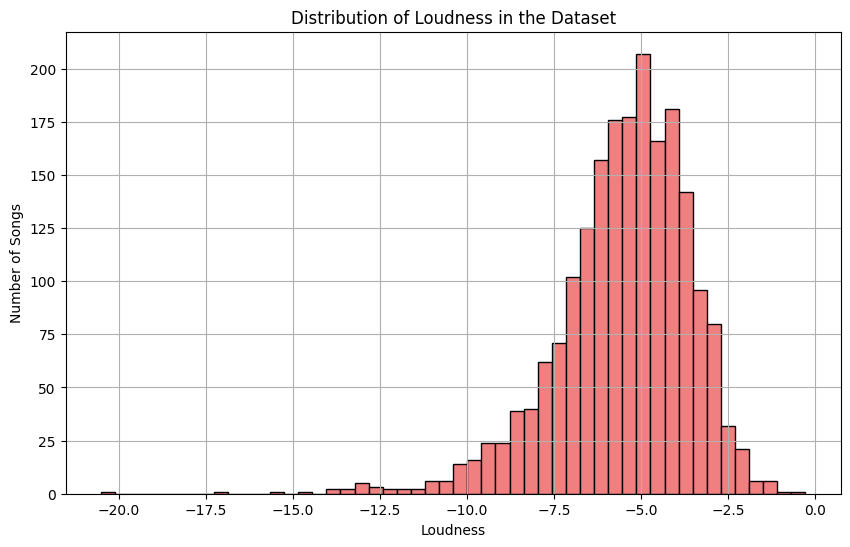

In [199]:
#32 What is the distribution of loudness in the dataset?
loudness = df['loudness'].describe()
print(loudness)

plt.figure(figsize=(10, 6))
plt.hist(df['loudness'], bins=50, color='lightcoral', edgecolor='black')
plt.xlabel('Loudness')
plt.ylabel('Number of Songs')
plt.title('Distribution of Loudness in the Dataset')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Average Energy')

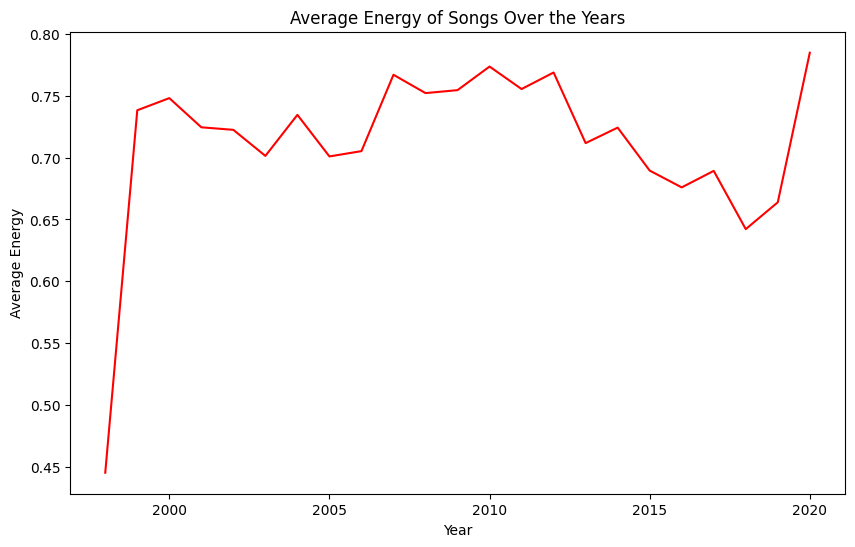

In [200]:
#33 How has the average energy of songs changed over the years?
avg_energy = df.groupby('year')['energy'].mean()

plt.figure(figsize = (10, 6))
avg_energy.plot(color = 'r')
plt.title('Average Energy of Songs Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Energy')

<Figure size 600x1200 with 0 Axes>

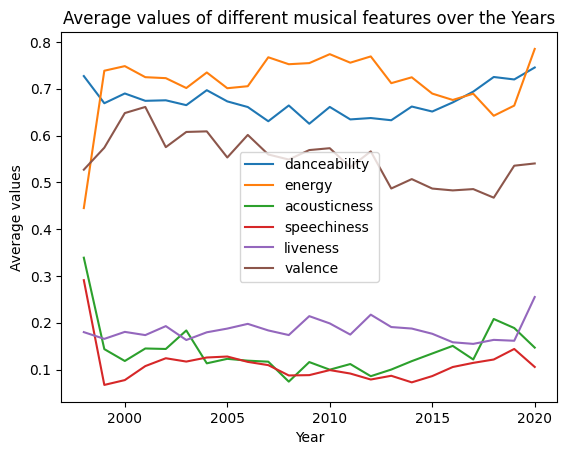

In [201]:
#34 How have the average values of different musical features (e.g., danceability, energy, acousticness) changed over the years?
songs_by_year = df.groupby('year')[['danceability', 'energy', 'acousticness','speechiness','liveness','valence']].mean()

plt.figure(figsize = (6, 12))
songs_by_year.plot()
plt.title('Average values of different musical features over the Years')
plt.xlabel('Year')
plt.ylabel('Average values')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

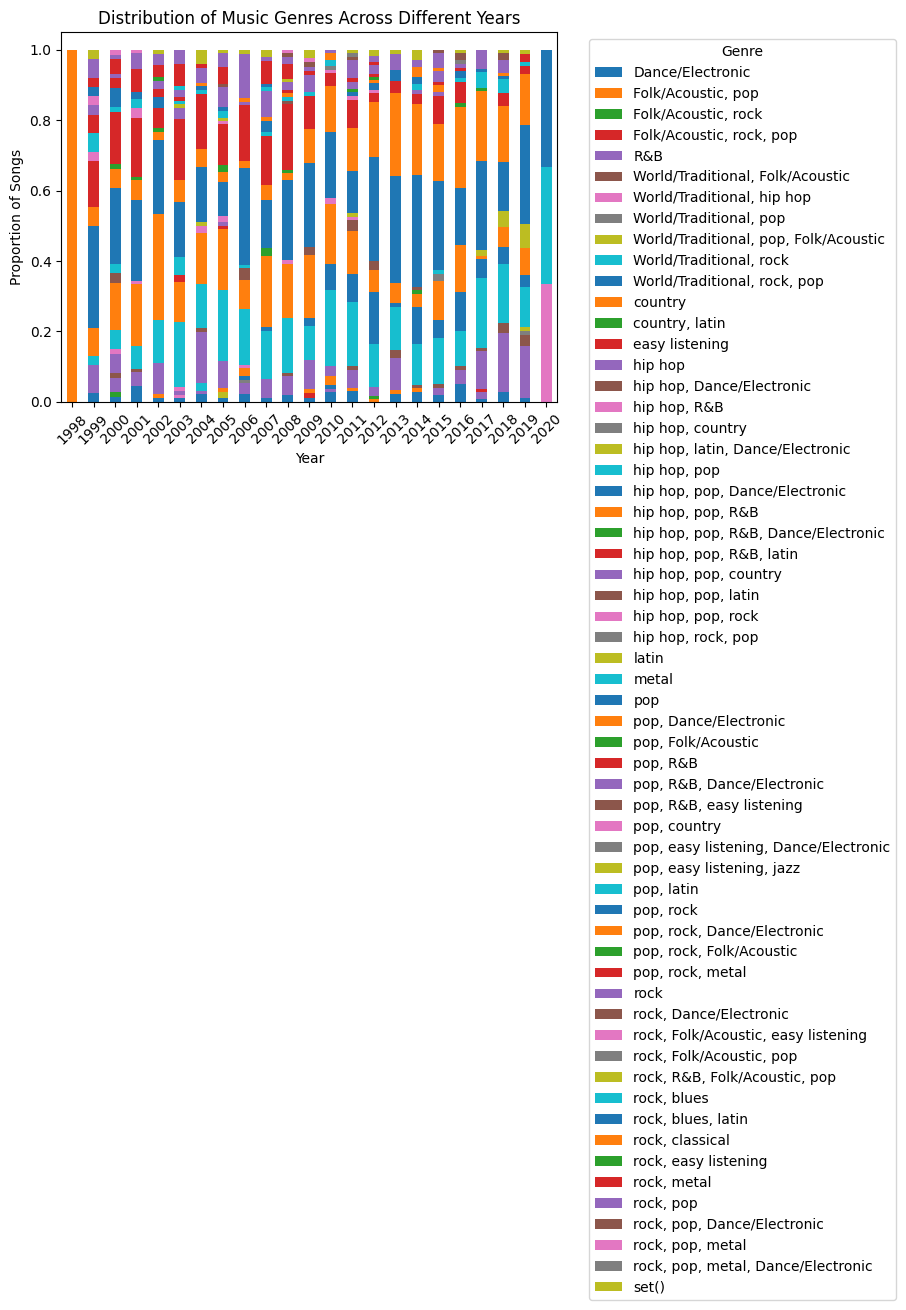

In [202]:
#35 How does the distribution of music genres vary across different years?
genre_counts_by_year = df.groupby(['year', 'genre']).size().unstack(fill_value=0)
genre_proportions_by_year = genre_counts_by_year.div(genre_counts_by_year.sum(axis=1), axis=0)
plt.figure(figsize=(12, 8))
genre_proportions_by_year.plot(kind='bar', stacked=True)
plt.title('Distribution of Music Genres Across Different Years')
plt.xlabel('Year')
plt.ylabel('Proportion of Songs')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

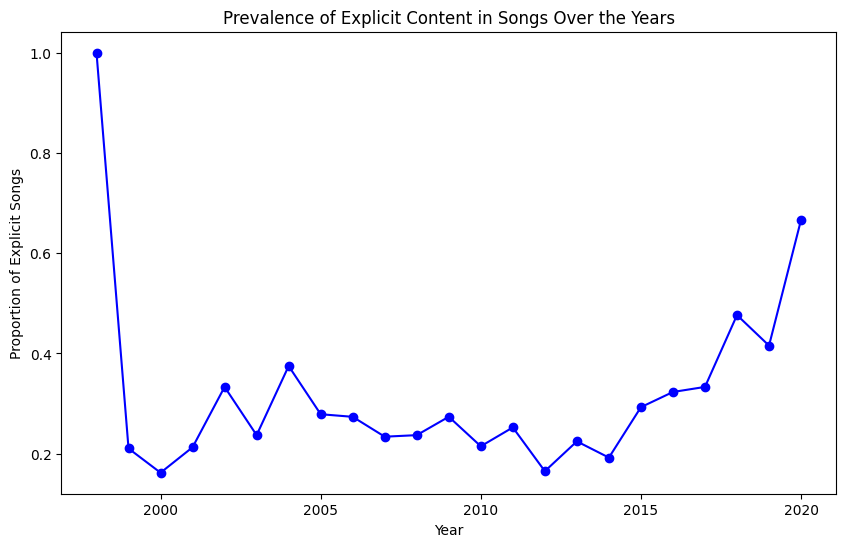

In [203]:
#36 Has there been a significant change in the prevalence of explicit content in songs over the years? If so, can you identify any patterns or trends in the data?

explicit_proportion_by_year = df.groupby('year')['explicit'].mean()

plt.figure(figsize=(10, 6))
explicit_proportion_by_year.plot(marker='o', color='b')
plt.title('Prevalence of Explicit Content in Songs Over the Years')
plt.xlabel('Year')
plt.ylabel('Proportion of Explicit Songs')
plt.show()

In [204]:
#37 Are certain music genres more likely to contain explicit content compared to others? Can you identify the genres with the highest and lowest proportions of explicit songs?

explicit_proportion_by_genre = df.groupby('genre')['explicit'].mean()
explicit_proportion_by_genre_sorted = explicit_proportion_by_genre.sort_values(ascending=False)
print("Genres with the highest proportion of explicit songs:")
print(explicit_proportion_by_genre_sorted.head())
print("\nGenres with the lowest proportion of explicit songs:")
print(explicit_proportion_by_genre_sorted.tail())

Genres with the highest proportion of explicit songs:
genre
Folk/Acoustic, rock, pop    1.000000
hip hop, pop, country       1.000000
hip hop                     0.862903
hip hop, pop                0.675090
hip hop, pop, rock          0.666667
Name: explicit, dtype: float64

Genres with the lowest proportion of explicit songs:
genre
pop, Folk/Acoustic                       0.0
pop, R&B, easy listening                 0.0
country, latin                           0.0
pop, easy listening, Dance/Electronic    0.0
pop, country                             0.0
Name: explicit, dtype: float64


The correlation between acousticness and energy is -0.4454685177458775


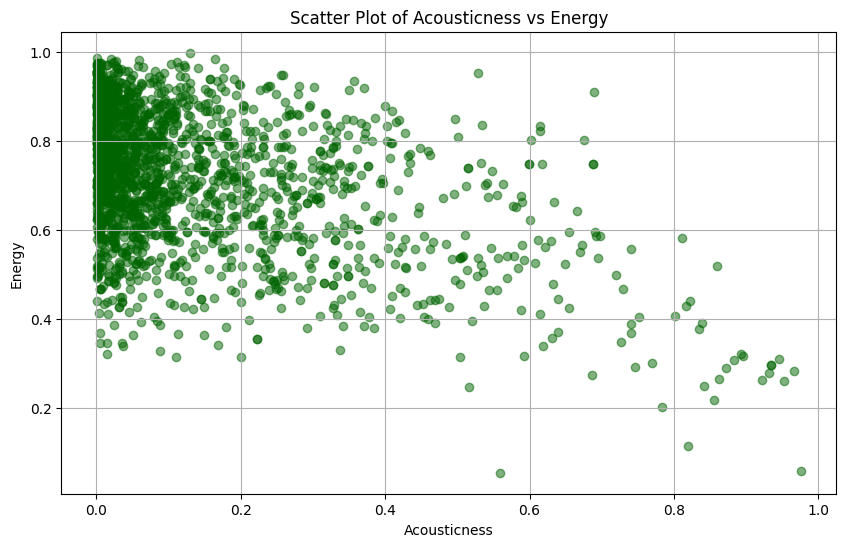

In [205]:
#38 What is the correlation between acousticness and energy?
correlation = df['acousticness'].corr(df['energy'])
print(f'The correlation between acousticness and energy is {correlation}')

plt.figure(figsize=(10, 6))
plt.scatter(df['acousticness'], df['energy'], alpha=0.5, color = 'darkgreen')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.title('Scatter Plot of Acousticness vs Energy')
plt.grid(True)
plt.show()

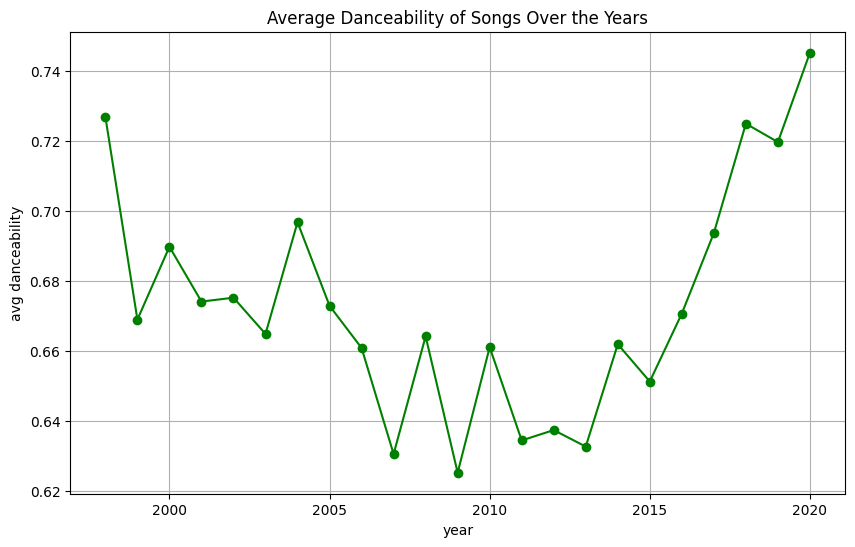

ANOVA result: F-statistic = 3.4790075436850447, p-value = 8.868073148418454e-08
There is a significant difference in average danceability across the years.


In [206]:
#39 Is there any particular year where the average danceability of songs was significantly higher or lower than other years?
avg = df.groupby('year')['danceability'].mean()

plt.figure(figsize=(10,6))
avg.plot(marker='o', color='g')
plt.grid(True)
plt.ylabel('avg danceability')
plt.title('Average Danceability of Songs Over the Years')
plt.show()

years = df['year'].unique()
dance_data = [df[df['year']==year]['danceability'] for year in years]
anova_result = stats.f_oneway(*dance_data)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print('There is a significant difference in average danceability across the years.')
else:
    print("There is no significant difference in average danceability across the years.")

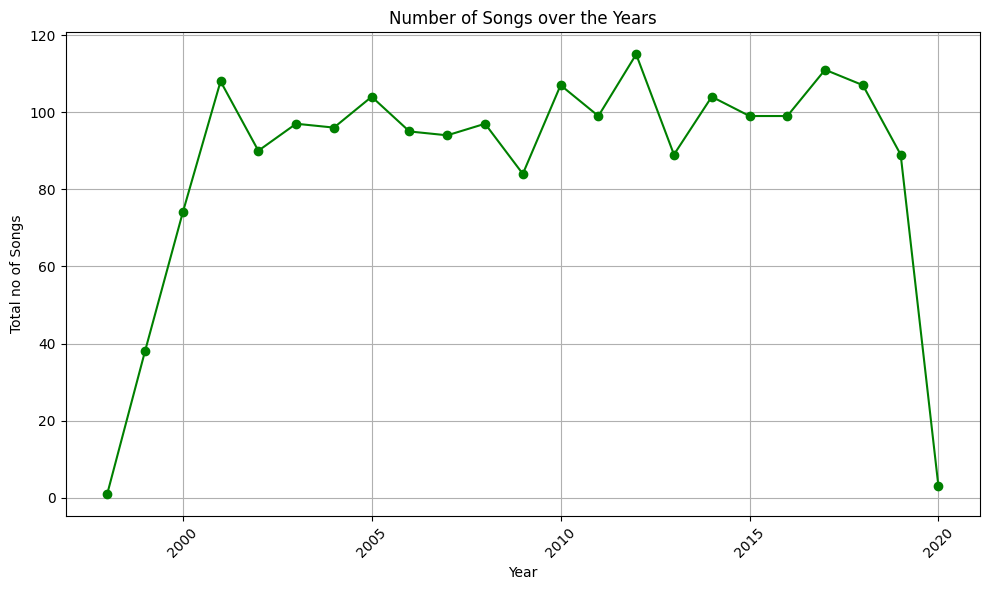

Chi-Square result: Chi-statistic = 242.10899999999998, p-value = 5.418068281372493e-39

There is a significant difference in average danceability across the years.
year
1998     1
1999    38
2020     3
Name: song, dtype: int64


In [207]:
#40 Are there any years with a significantly higher or lower number of songs compared to others? If so, can you identify the reasons behind these variations

no_of_songs = df.groupby('year')['song'].count()

plt.figure(figsize=(10,6))
no_of_songs.plot(marker='o', color='g')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Total no of Songs')
plt.title('Number of Songs over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

observed_frequencies = no_of_songs.values
chi2_stat, p_val = stats.chisquare(observed_frequencies)
print(f"Chi-Square result: Chi-statistic = {chi2_stat}, p-value = {p_val}")
print()
if anova_result.pvalue < 0.05:
    print('There is a significant difference in average danceability across the years.')
    
    deviation = observed_frequencies - observed_frequencies.mean()
    std_dev = deviation.std()
    significant_years = no_of_songs[np.abs(deviation) > std_dev]
    print(significant_years)
else:
    print("There is no significant difference in average danceability across the years.")


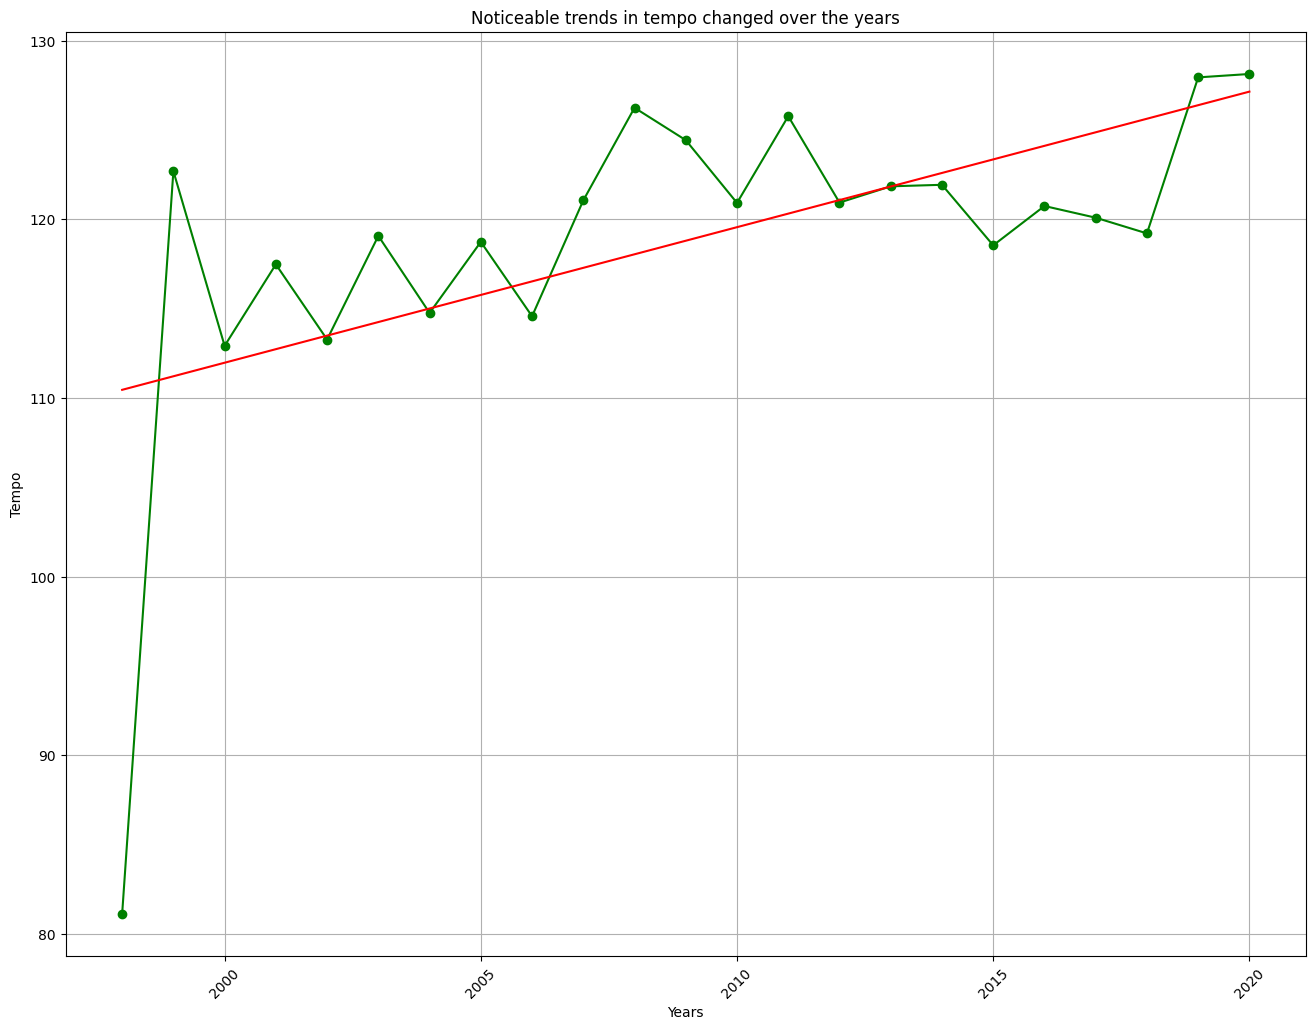

In [208]:
#41 Are there any noticeable trends or shifts in tempo across different years
from scipy.stats import linregress

trends = df.groupby('year')['tempo'].mean().reset_index()

plt.figure(figsize=(16,12))
plt.plot(trends['year'], trends['tempo'], marker='o', linestyle='-',color='g')
plt.xlabel('Years')
plt.ylabel('Tempo')
plt.title('Noticeable trends in tempo changed over the years')

slope, intercept, rvalue, pvalue, stderr= linregress(trends['year'], trends['tempo'])
plt.plot(trends['year'], intercept + slope*trends['year'], color='r')

plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

Significant Changes came at year : 1998 - 1999
Significant Changes came at year : 2003 - 2004
Significant Changes came at year : 2004 - 2005
Significant Changes came at year : 2006 - 2007
Significant Changes came at year : 2012 - 2013
Significant Changes came at year : 2019 - 2020


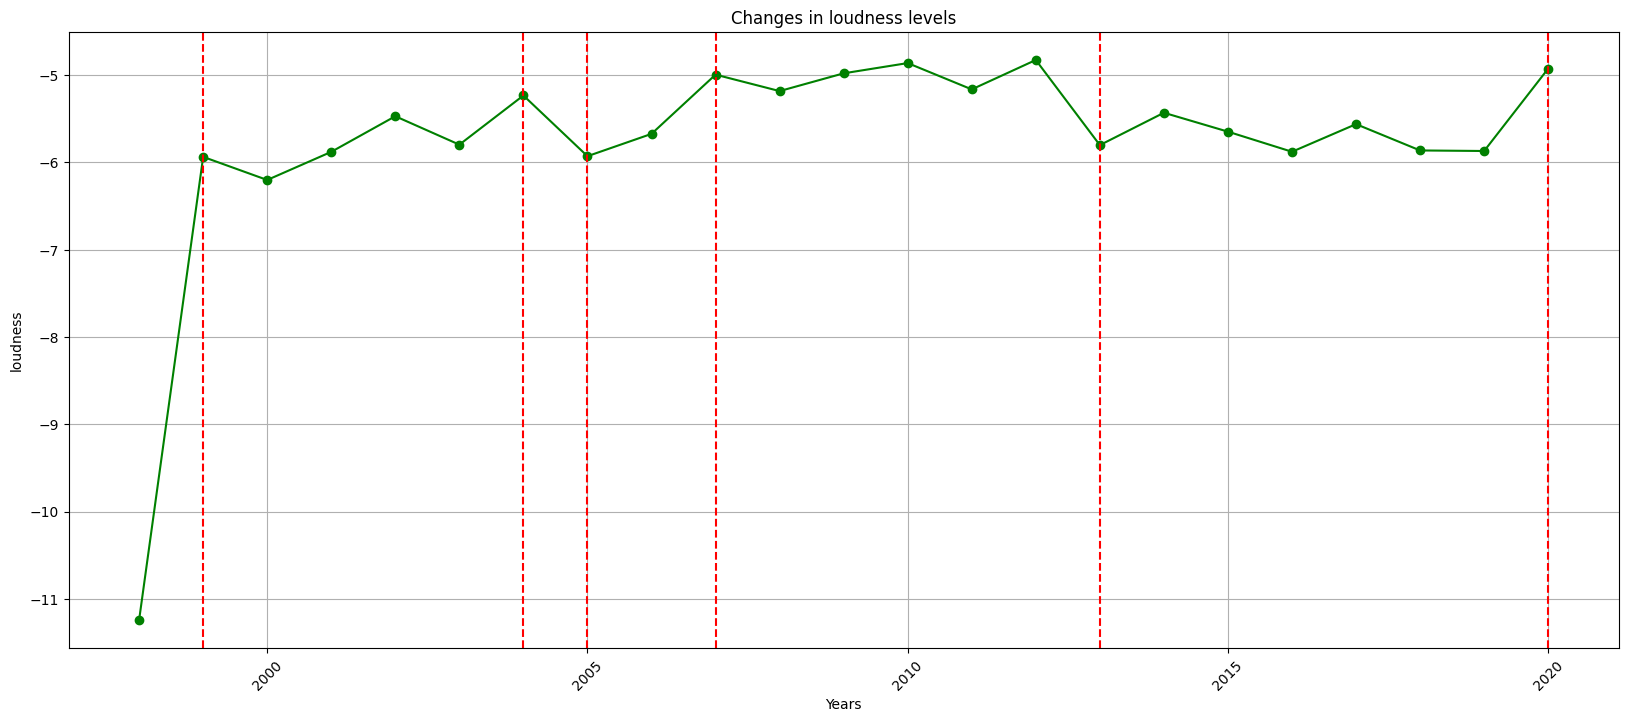

In [209]:
#42 Are there any specific years where there are significant changes in loudness levels
loudness_levels = df.groupby('year')['loudness'].mean().reset_index()
loudness_levels['diff'] = loudness_levels['loudness'].diff()

plt.figure(figsize=(20,8))
plt.plot(loudness_levels['year'], loudness_levels['loudness'], marker='o', linestyle='-',color='g')
plt.xlabel('Years')
plt.ylabel('loudness')
plt.title('Changes in loudness levels')
plt.grid(True)

threshold = 0.5
changes = loudness_levels[(loudness_levels['diff'] > threshold) | (loudness_levels['diff'] < -threshold)]
for index, row in changes.iterrows():
    print('Significant Changes came at year :' , int(row['year'])-1, '-', int(row['year']))
    plt.axvline(x=row['year'], color='r', linestyle='--')

plt.xticks(rotation = 45)
plt.show()

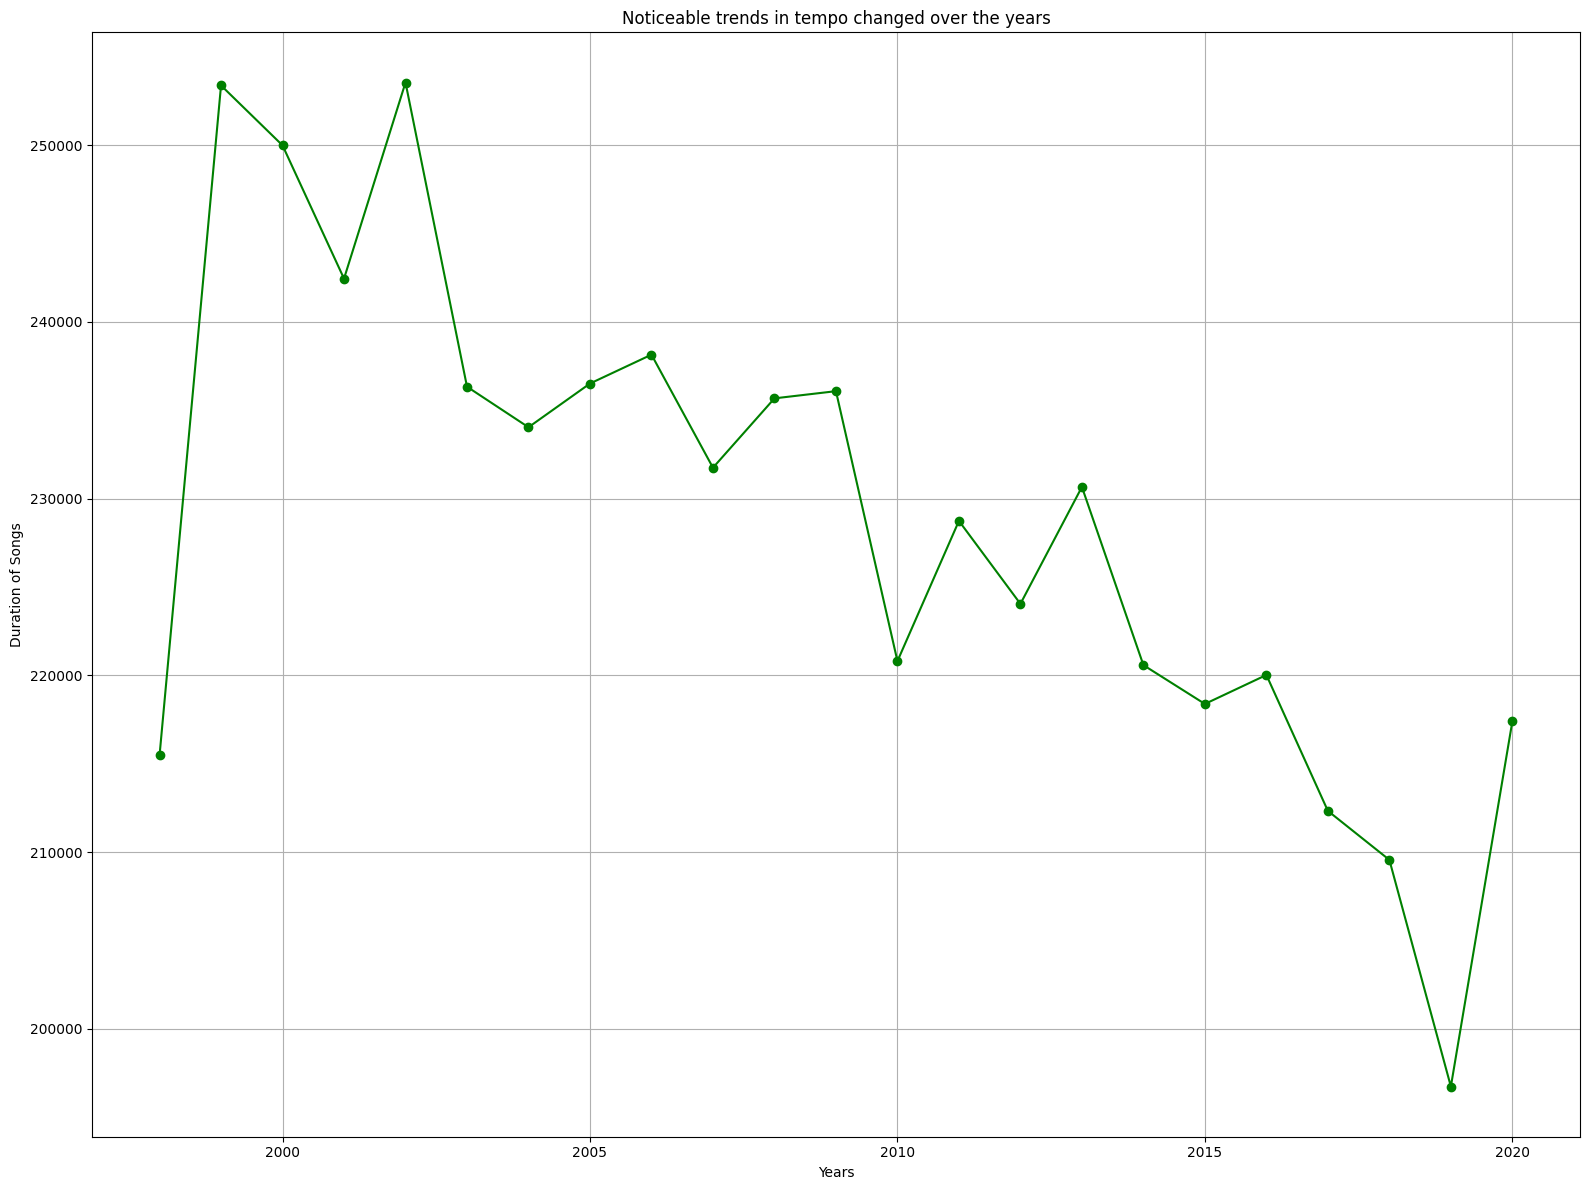

1998 has shorter duration than last year songs
1999 has longer duration than last year songs
2000 has shorter duration than last year songs
2001 has shorter duration than last year songs
2002 has longer duration than last year songs
2003 has shorter duration than last year songs
2004 has shorter duration than last year songs
2005 has longer duration than last year songs
2006 has longer duration than last year songs
2007 has shorter duration than last year songs
2008 has longer duration than last year songs
2009 has longer duration than last year songs
2010 has shorter duration than last year songs
2011 has longer duration than last year songs
2012 has shorter duration than last year songs
2013 has longer duration than last year songs
2014 has shorter duration than last year songs
2015 has shorter duration than last year songs
2016 has longer duration than last year songs
2017 has shorter duration than last year songs
2018 has shorter duration than last year songs
2019 has shorter durat

In [210]:
#43 Are songs becoming shorter or longer on average compared to previous years
songs = df.groupby('year')['duration_ms'].mean().reset_index()
songs['diff'] = songs['duration_ms'].diff().round(2)

plt.figure(figsize=(16,12))
plt.plot(songs['year'], songs['duration_ms'], marker='o', linestyle='-',color='g')
plt.xlabel('Years')
plt.ylabel('Duration of Songs')
plt.title('Noticeable trends in tempo changed over the years')
plt.grid(True)
plt.tight_layout()
plt.show()

for index, row in songs.iterrows():
    if row['diff'] > 0:
        print(int(row['year']), 'has longer duration than last year songs')
    else:
        print(int(row['year']), 'has shorter duration than last year songs')

1999 has noticable trend
2001 has noticable trend
2002 has noticable trend
2008 has noticable trend
2016 has noticable trend
2019 has noticable trend
2020 has noticable trend


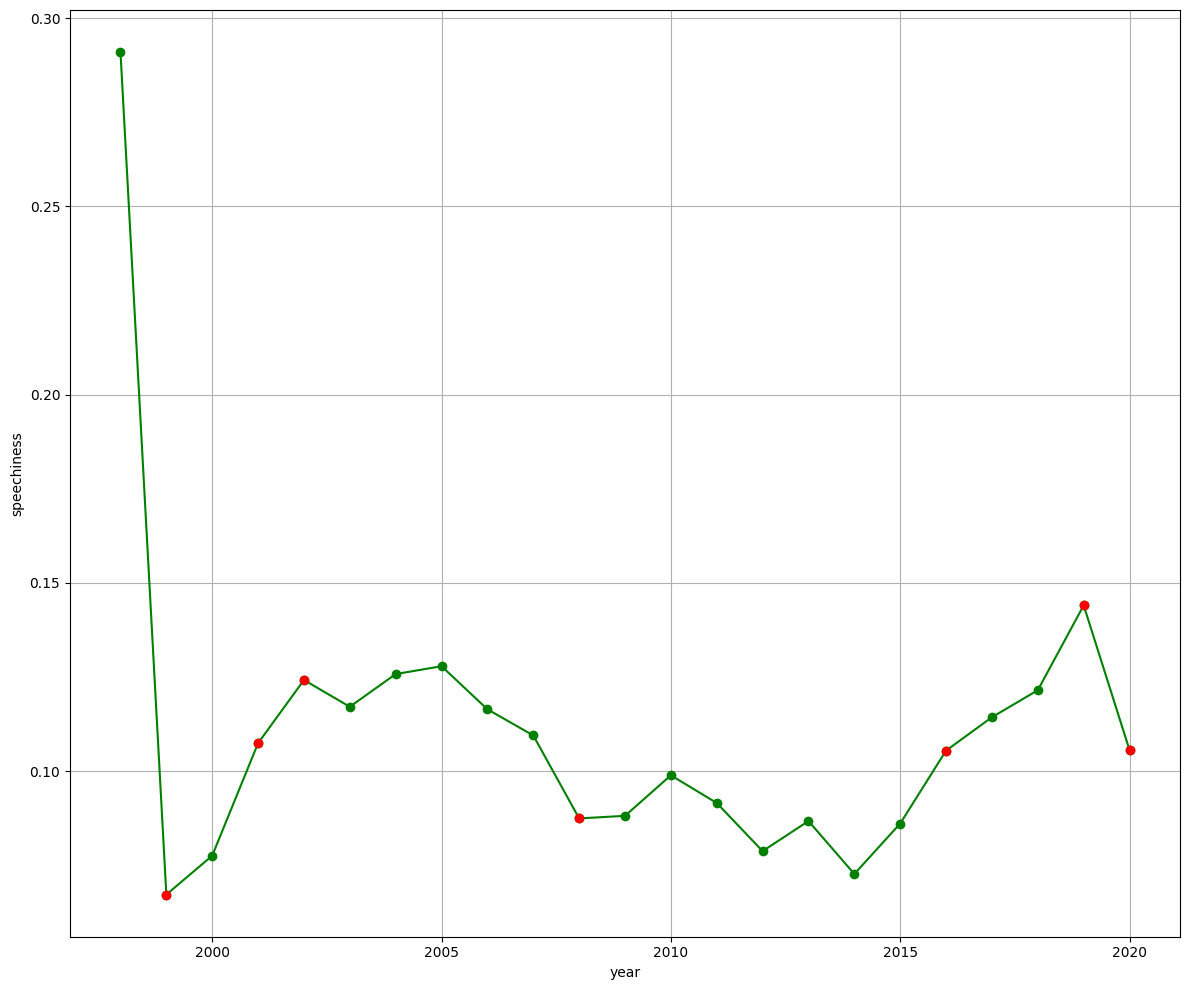

In [211]:
#44 Are there any specific years where there are noticeable trends in speechiness
speechiness = df.groupby('year')['speechiness'].mean().reset_index()
speechiness['diff'] = speechiness['speechiness'].diff()

plt.figure(figsize=(12,10))
plt.plot(speechiness['year'],speechiness['speechiness'],marker='o',color='g')

threshold = 0.015
for i in range(1, len(speechiness)):
    if abs(speechiness.loc[i, 'diff']) > threshold:
        print(speechiness.loc[i,'year'], 'has noticable trend')
        plt.scatter(speechiness.loc[i,'year'], speechiness.loc[i,'speechiness'],color='r',zorder=2)

plt.xlabel('year')
plt.ylabel('speechiness')
plt.grid(True)
plt.tight_layout()
plt.show()

Year 
1999,2000,2002,2005,2006,2013,2019, have noticable changes in emotional tone


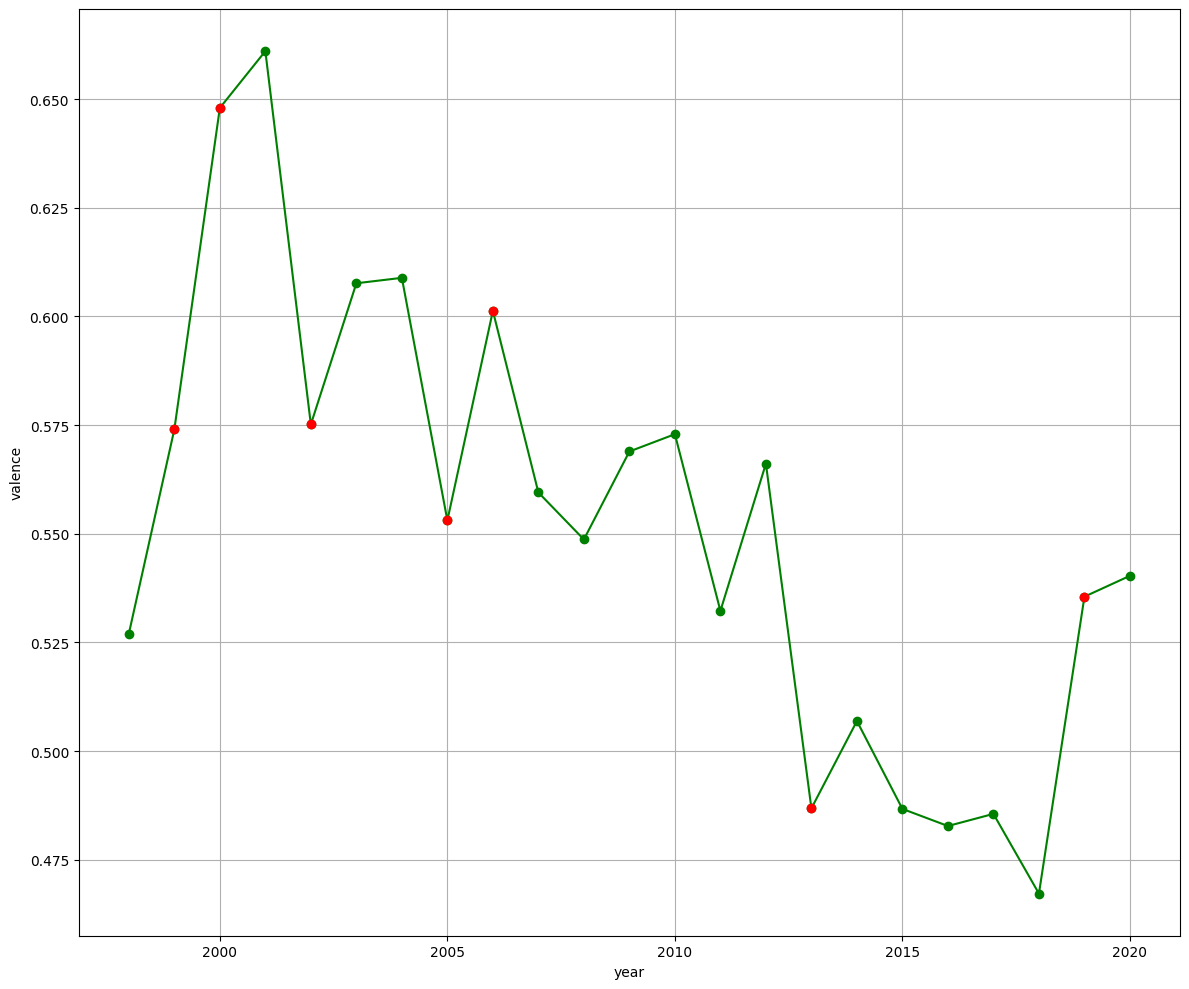

In [212]:
#45 Are there any specific years where there are significant changes in the emotional tone of songs?
valence = df.groupby('year')['valence'].mean().reset_index()
valence['diff'] = valence['valence'].diff()

plt.figure(figsize=(12,10))
plt.plot(valence['year'],valence['valence'],marker='o',color='g')

threshold = 0.045
print('Year ')
for i in range(1, len(valence)):
    if abs(valence.loc[i, 'diff']) > threshold:
        print(valence.loc[i,'year'], end = ',')
        plt.scatter(valence.loc[i,'year'], valence.loc[i,'valence'],color='r',zorder=2)
print(' have noticable changes in emotional tone')

plt.xlabel('year')
plt.ylabel('valence')
plt.grid(True)
plt.tight_layout()
plt.show()

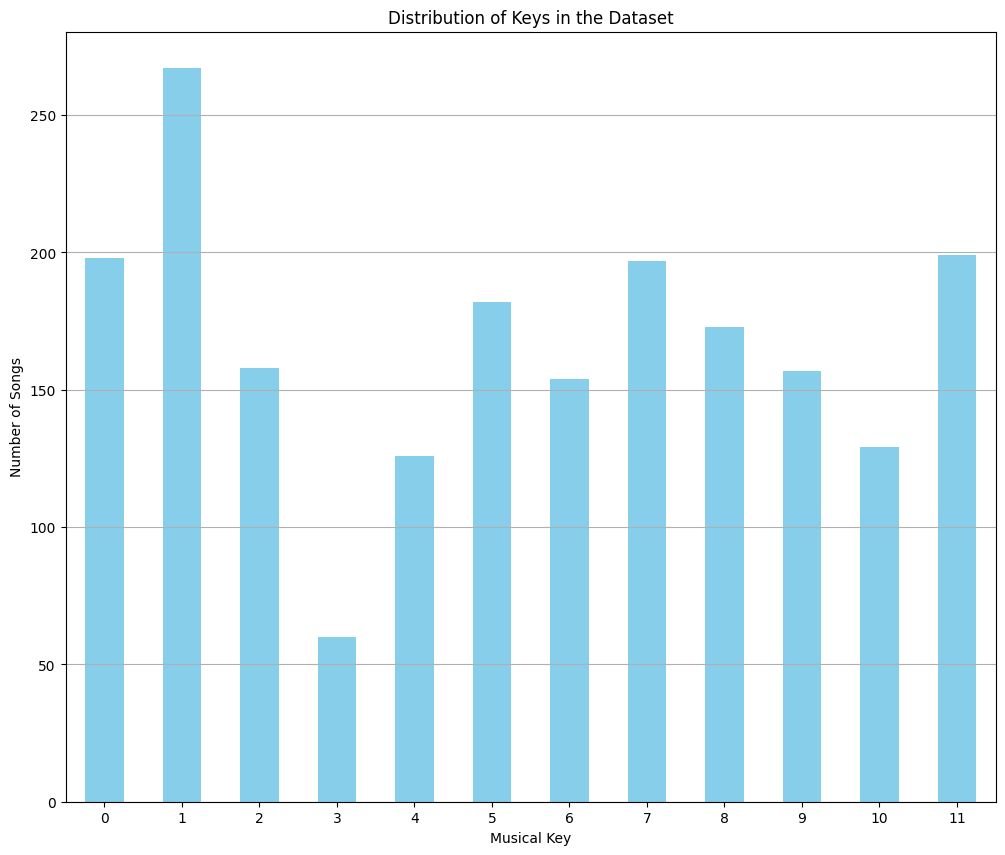

In [213]:
#46 What is the distribution of keys in the dataset?
keys = df['key'].value_counts().sort_index()

plt.figure(figsize=(12,10))
keys.plot(kind='bar', color='skyblue')
plt.xlabel('Musical Key')
plt.ylabel('Number of Songs')
plt.title('Distribution of Keys in the Dataset')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

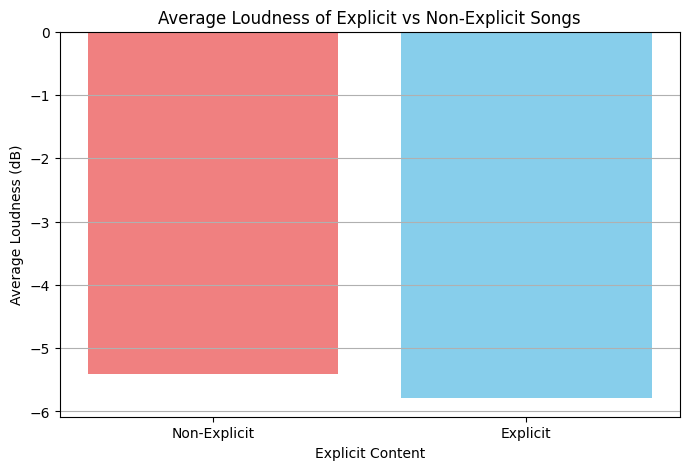

In [214]:
#47 How does the average loudness differ between explicit and non-explicit songs?
loudness = df.groupby('explicit')['loudness'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(loudness['explicit'], loudness['loudness'], color = ['lightcoral','skyblue'])
plt.xlabel('Explicit Content')
plt.ylabel('Average Loudness (dB)')
plt.title('Average Loudness of Explicit vs Non-Explicit Songs')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'], rotation=0)
plt.grid(axis='y')
plt.show()

The correlation between danceability and popularity is: -0.003545730265811893


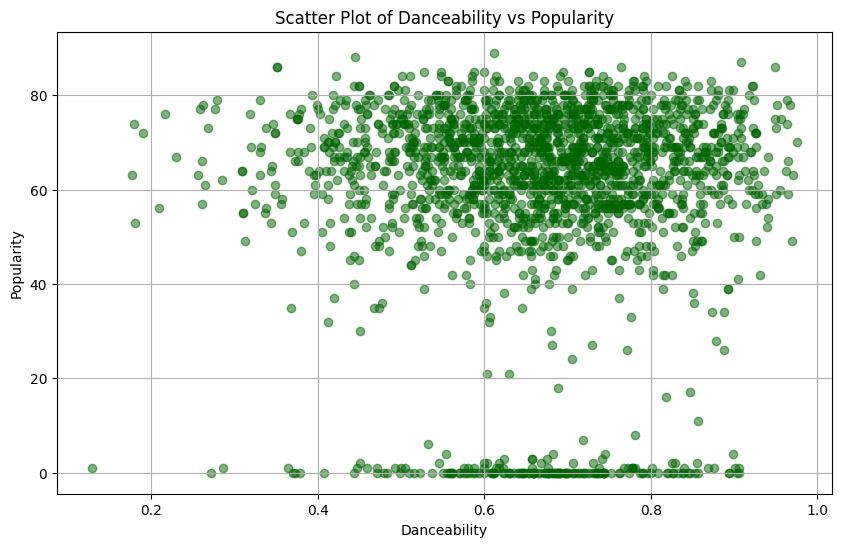

In [215]:
#48 What is the correlation between danceability and popularity?
correlation = df['danceability'].corr(df['popularity'])
print('The correlation between danceability and popularity is:', correlation)

plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['popularity'], alpha=0.5, color = 'darkgreen')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Danceability vs Popularity')
plt.grid(True)
plt.show()

count    2000.000000
mean      120.122558
std        26.967112
min        60.019000
25%        98.985750
50%       120.021500
75%       134.265500
max       210.851000
Name: tempo, dtype: float64


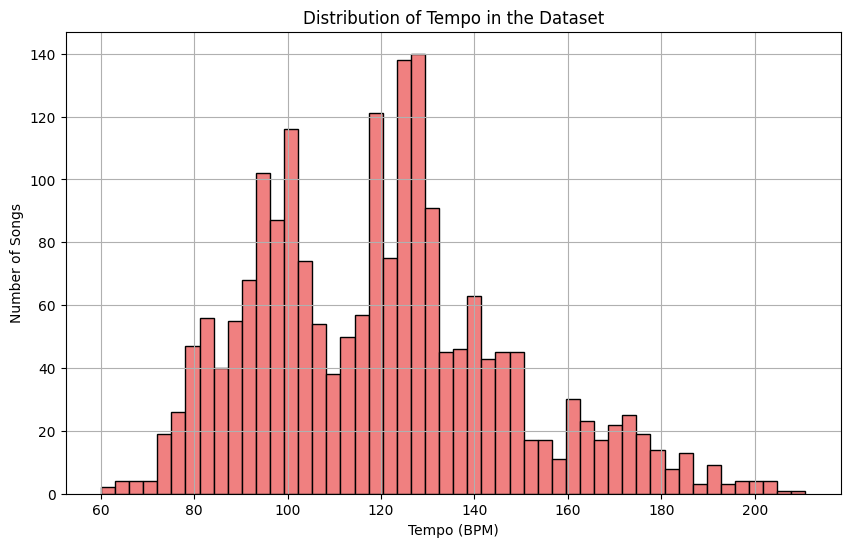

In [216]:
#49 What is the distribution of tempo in the dataset?
tempo_stats = df['tempo'].describe()
print(tempo_stats)

plt.figure(figsize=(10, 6))
plt.hist(df['tempo'], bins=50, color='lightcoral', edgecolor='black')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Number of Songs')
plt.title('Distribution of Tempo in the Dataset')
plt.grid(True)
plt.show()

The correlation between energy and loudness is: 0.651015522836913


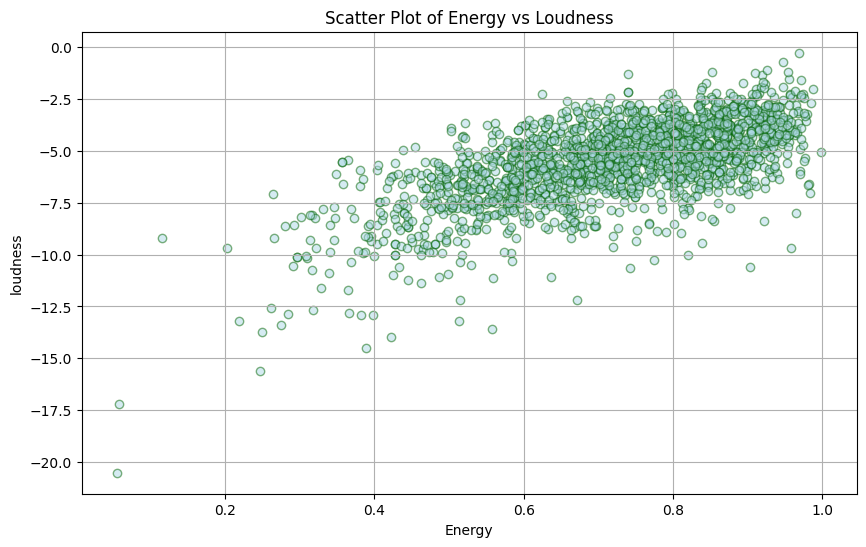

In [217]:
#50 What is the correlation between energy and loudness?
correlation = df['energy'].corr(df['loudness'])
print('The correlation between energy and loudness is:', correlation)

plt.figure(figsize=(10, 6))
plt.scatter(df['energy'], df['loudness'], alpha=0.5, color = 'lightblue',edgecolor='darkgreen')
plt.xlabel('Energy')
plt.ylabel('loudness')
plt.title('Scatter Plot of Energy vs Loudness')
plt.grid(True)
plt.show()

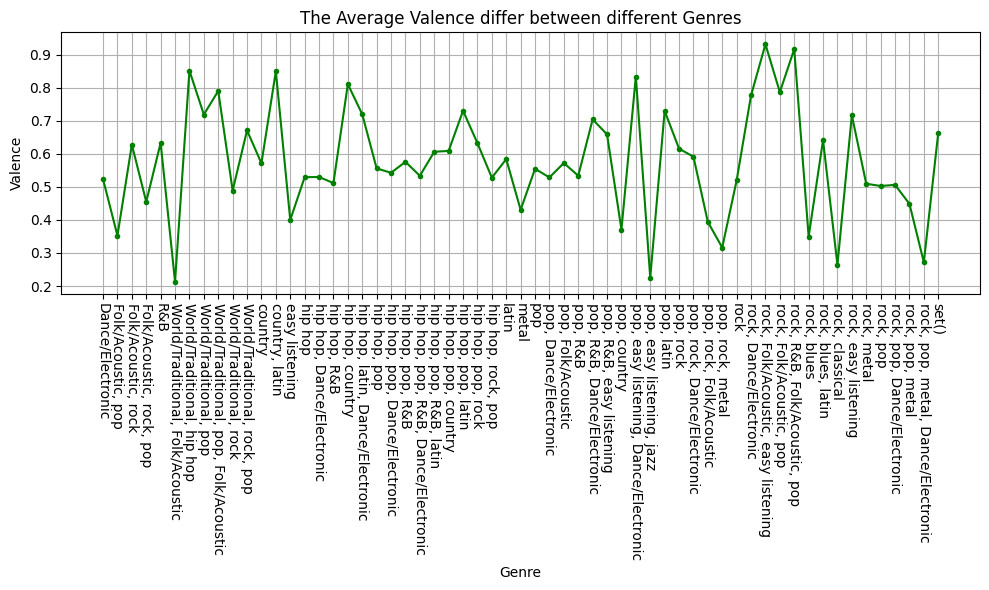

In [218]:
#51 How does the average valence differ between different genres?
avg = df.groupby('genre')['valence'].mean().reset_index()
plt.figure(figsize = (10,6))
plt.plot(avg['genre'], avg['valence'], color='g', marker = '.')
plt.xlabel('Genre')
plt.ylabel('Valence')
plt.title('The Average Valence differ between different Genres')
plt.xticks(rotation=270)
plt.grid(True)
plt.tight_layout()
plt.show()

Years with significant changes in musical characteristics:
Year 1998: Significant changes in popularity, danceability, energy, loudness, tempo
Year 2018: Significant changes in popularity, danceability
Year 2020: Significant changes in popularity, danceability


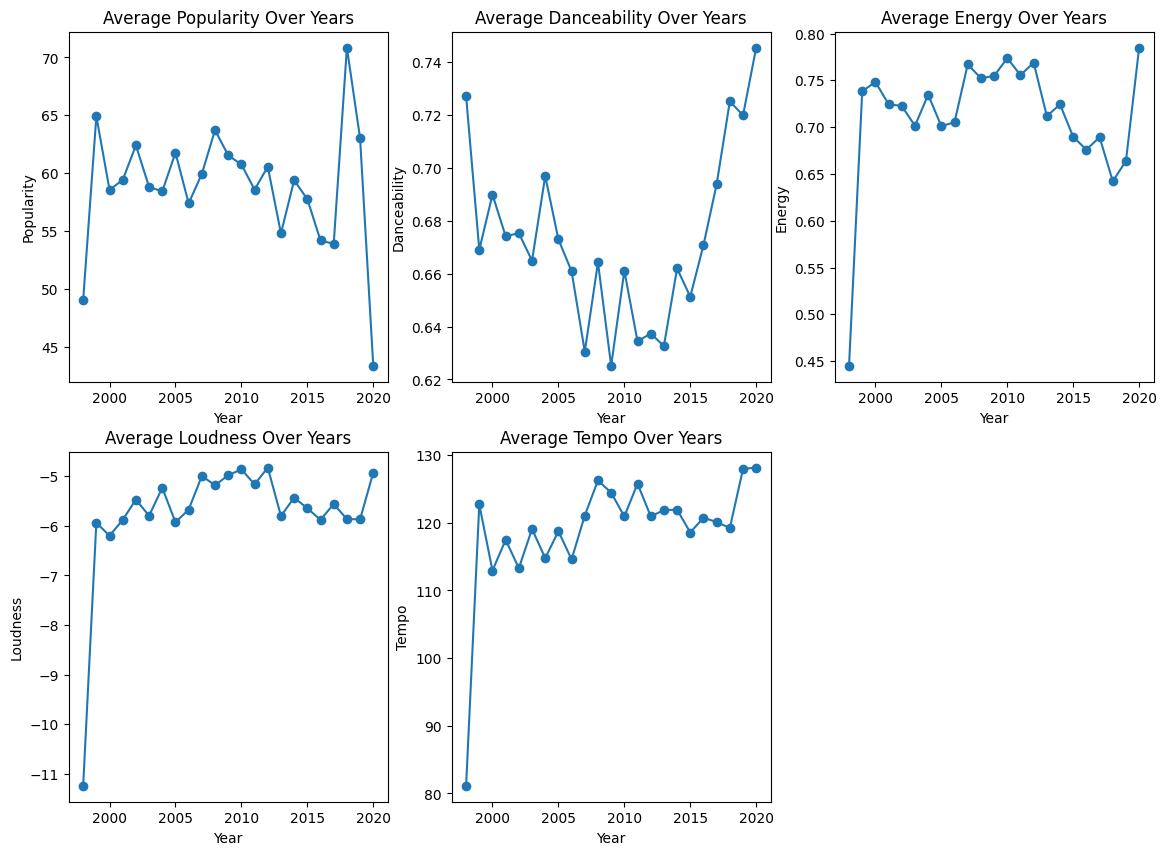

In [219]:
#52 Are there any specific years where there are noticeable trends or shifts in musical characteristics
yearly_trends = df.groupby('year').agg({'popularity': 'mean', 'danceability': 'mean', 'energy': 'mean', 'loudness': 'mean', 'tempo': 'mean'}).reset_index()

plt.figure(figsize=(14,10))

#popularity
plt.subplot(2,3,1)
plt.plot(yearly_trends['year'], yearly_trends['popularity'], marker='o')
plt.title('Average Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity')

#danceability
plt.subplot(2, 3, 2)
plt.plot(yearly_trends['year'], yearly_trends['danceability'], marker='o')
plt.title('Average Danceability Over Years')
plt.xlabel('Year')
plt.ylabel('Danceability')

# Energy
plt.subplot(2, 3, 3)
plt.plot(yearly_trends['year'], yearly_trends['energy'], marker='o')
plt.title('Average Energy Over Years')
plt.xlabel('Year')
plt.ylabel('Energy')

# Loudness
plt.subplot(2, 3, 4)
plt.plot(yearly_trends['year'], yearly_trends['loudness'], marker='o')
plt.title('Average Loudness Over Years')
plt.xlabel('Year')
plt.ylabel('Loudness')

# Tempo
plt.subplot(2, 3, 5)
plt.plot(yearly_trends['year'], yearly_trends['tempo'], marker='o')
plt.title('Average Tempo Over Years')
plt.xlabel('Year')
plt.ylabel('Tempo')


#checking trends and shifts
std_devs = yearly_trends[['popularity', 'danceability', 'energy', 'loudness', 'tempo']].std()
significant_years = {}
threshold = 1.5  

for characteristic in std_devs.index:
    mean_value = yearly_trends[characteristic].mean()
    for year, value in zip(yearly_trends['year'], yearly_trends[characteristic]):
        if abs(value - mean_value) > threshold * std_devs[characteristic]:
            if year not in significant_years:
                significant_years[year] = []
            significant_years[year].append(characteristic)

# Display the significant years and the characteristics that changed
print("Years with significant changes in musical characteristics:")
for year, changes in significant_years.items():
    print(f"Year {year}: Significant changes in {', '.join(changes)}")

count      2000.000000
mean     228748.124500
std       39136.569008
min      113000.000000
25%      203580.000000
50%      223279.500000
75%      248133.000000
max      484146.000000
Name: duration_ms, dtype: float64


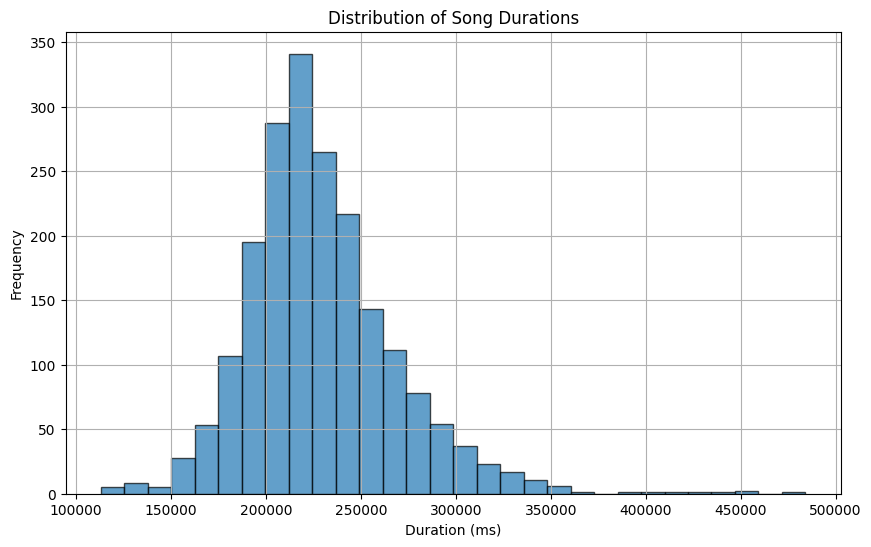

In [220]:
#53 What is the distribution of song durations in the dataset?
duration = df['duration_ms'].describe()
print(duration)

plt.figure(figsize=(10, 6))
plt.hist(df['duration_ms'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.grid(True)
plt.show()

Pearson correlation coefficient: -0.0038252486179311193
P-value: 0.8642520769148018


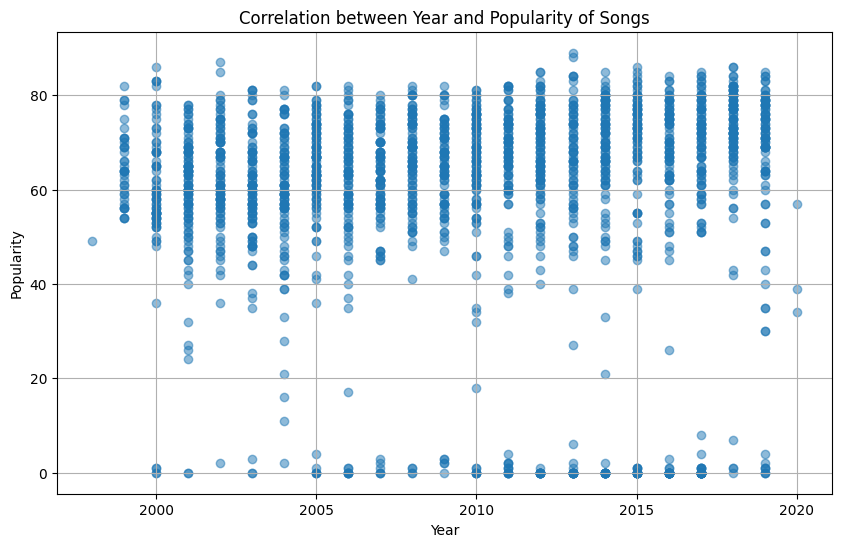

In [221]:
#54 Find out if there is a correlation between the year and the popularity of a song.
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['year'], df['popularity'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['popularity'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Correlation between Year and Popularity of Songs')
plt.grid(True)
plt.show()

In [222]:
#55 Identify artists whose average song duration increased over the years.
artist_duration = df.groupby(['artist','year'])['duration_ms'].mean().reset_index()
artist_duration['diff'] = artist_duration.groupby('artist')['duration_ms'].diff()
artist_duration = artist_duration.drop_duplicates(subset=['artist'], keep='last').dropna()
print("Artists whose average song duration increased over the years are:")
count = 0
for index, row in artist_duration.iterrows():
    if row['diff'] > 0:
        print(row['artist'])
        count += 1
print(count)

Artists whose average song duration increased over the years are:
*NSYNC
21 Savage
3 Doors Down
3OH!3
50 Cent
Aaliyah
Adele
Akon
Alessia Cara
Alesso
Anastacia
Arctic Monkeys
Atomic Kitten
Avant
B2K
Backstreet Boys
Bad Bunny
Basement Jaxx
Birdy
Blake Shelton
Bob Sinclar
Bow Wow
Boys Like Girls
Britney Spears
Calvin Harris
Carrie Underwood
Chris Brown
Ciara
Clean Bandit
Cobra Starship
Céline Dion
DJ Fresh
DJ Khaled
Destiny's Child
Diddy
Dido
Dr. Dre
Duke Dumont
Ellie Goulding
Enrique Iglesias
Eve
Example
Fall Out Boy
Fat Joe
Foo Fighters
G-Eazy
Green Day
Gwen Stefani
Gym Class Heroes
Halsey
Icona Pop
JAY-Z
Ja Rule
Jason Aldean
Jason Derulo
Jay Sean
Jeezy
Jeremih
Jonas Blue
Jonas Brothers
Jordin Sparks
Juice WRLD
Katy Perry
Kelis
Kelly Rowland
Kendrick Lamar
Kesha
Liam Payne
Lil' Kim
Lily Allen
Limp Bizkit
Little Mix
Lorde
Major Lazer
Martin Garrix
Meghan Trainor
Miley Cyrus
Muse
Ne-Yo
Nelly
Nick Jonas
Nicki Minaj
Offset
Olly Murs
OneRepublic
Panic! At The Disco
Paramore
Pitbull
Plies
Pre

In [223]:
#56 Analyze the relationship between song tempo and popularity for different genres.
genre_mp = {}
for genre in df['genre'].unique():
    genre_df = df[df['genre']==genre]
    if len(genre_df) > 1:
        correlation, p_value = pearsonr(genre_df['tempo'], genre_df['popularity'])
        genre_mp[genre] = (correlation, p_value)

for genre, (correlation, p_value) in genre_mp.items():
    print(f"Genre: '{genre}', Correlation: '{correlation}', P_Value: '{p_value}' ")

Genre: 'pop', Correlation: '0.032050333690159465', P_Value: '0.5084242724435047' 
Genre: 'rock, pop', Correlation: '0.1632622860009327', P_Value: '0.2955266456380614' 
Genre: 'pop, country', Correlation: '-0.09626602130106131', P_Value: '0.8206132490088379' 
Genre: 'rock, metal', Correlation: '-0.061027951069521656', P_Value: '0.715877372065591' 
Genre: 'hip hop, pop, R&B', Correlation: '0.1326368703796734', P_Value: '0.03841760435520652' 
Genre: 'hip hop', Correlation: '-0.027784561185009552', P_Value: '0.7593599025203701' 
Genre: 'pop, rock', Correlation: '-0.13034465538882645', P_Value: '0.5256506189342807' 
Genre: 'pop, R&B', Correlation: '-0.007618120296882568', P_Value: '0.9196109539675151' 
Genre: 'Dance/Electronic', Correlation: '0.04916497752373364', P_Value: '0.7601692670317878' 
Genre: 'pop, Dance/Electronic', Correlation: '0.0026893221999217437', P_Value: '0.9682900469373075' 
Genre: 'metal', Correlation: '-0.16967999991339194', P_Value: '0.6625172167112554' 
Genre: 'hip ho

C:\Users\HP\AppData\Local\Temp\ipykernel_9000\473358154.py:6: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



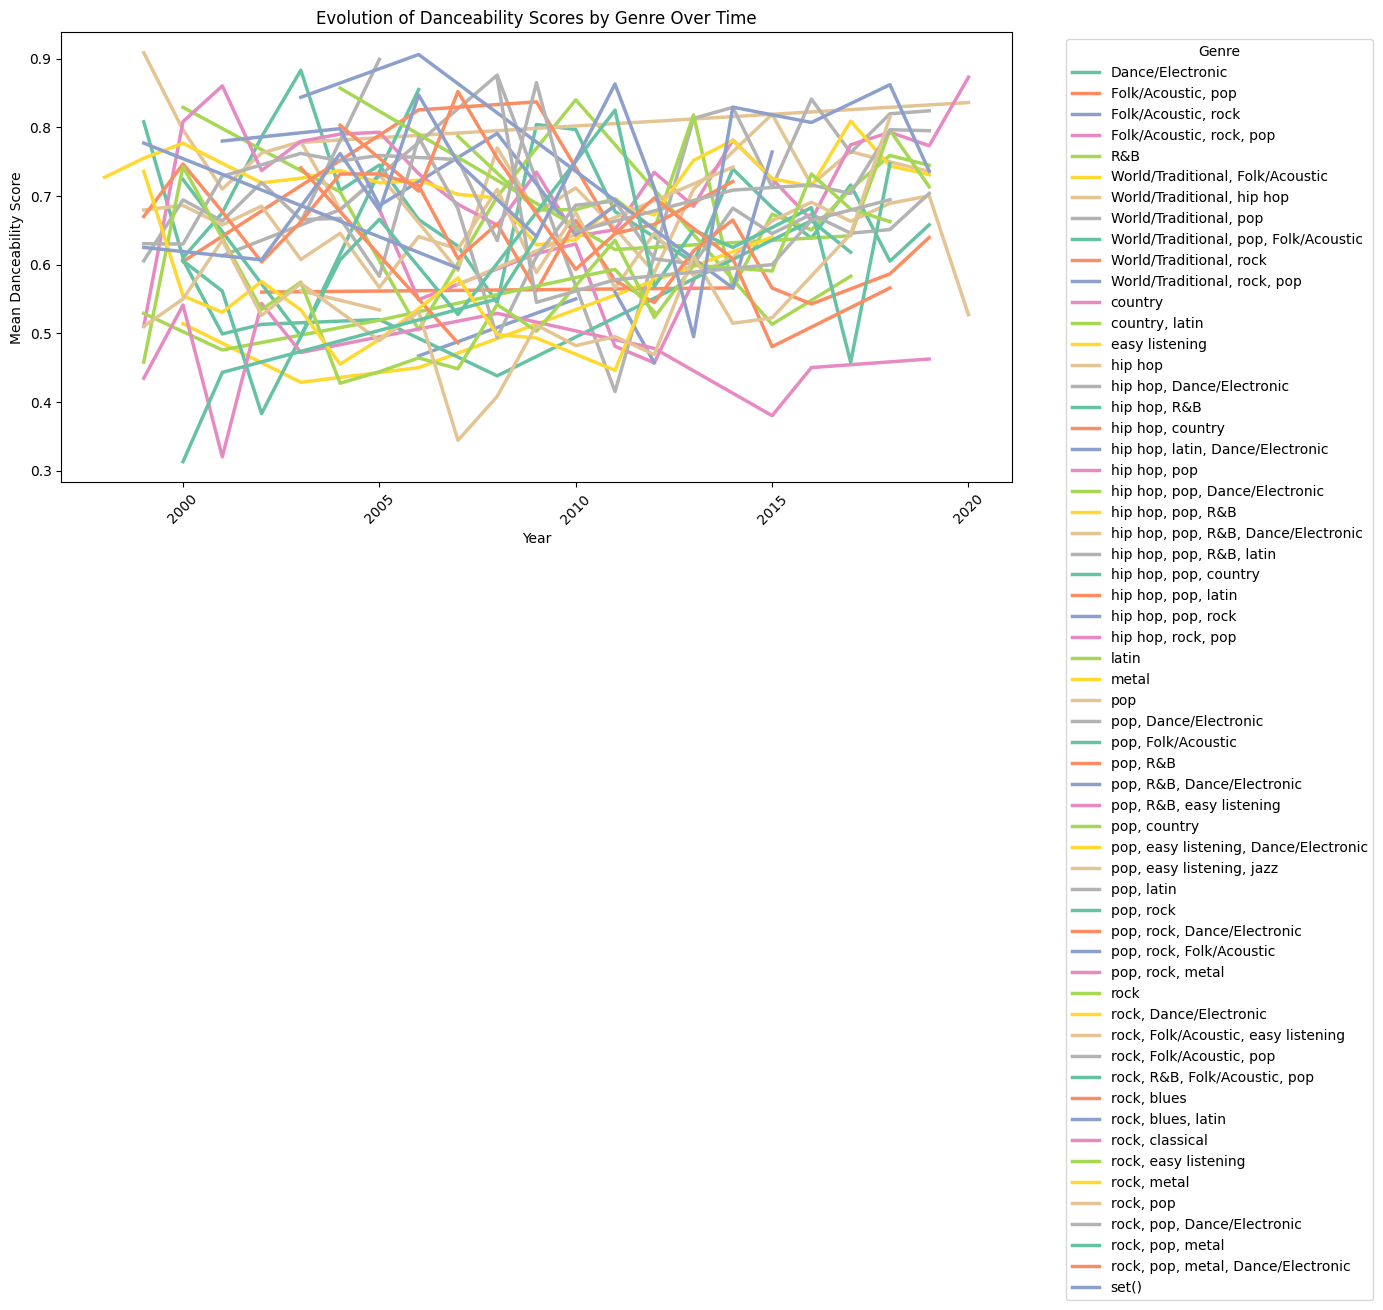

In [224]:
#57 Track the evolution of danceability scores for each genre over time.
genre = df.groupby(['genre', 'year'])['danceability'].mean().reset_index()

plt.figure(figsize=(14, 10))
sns.lineplot(x='year', y='danceability', hue='genre', data=genre, palette='Set2', linewidth=2.5)
plt.title('Evolution of Danceability Scores by Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Danceability Score')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

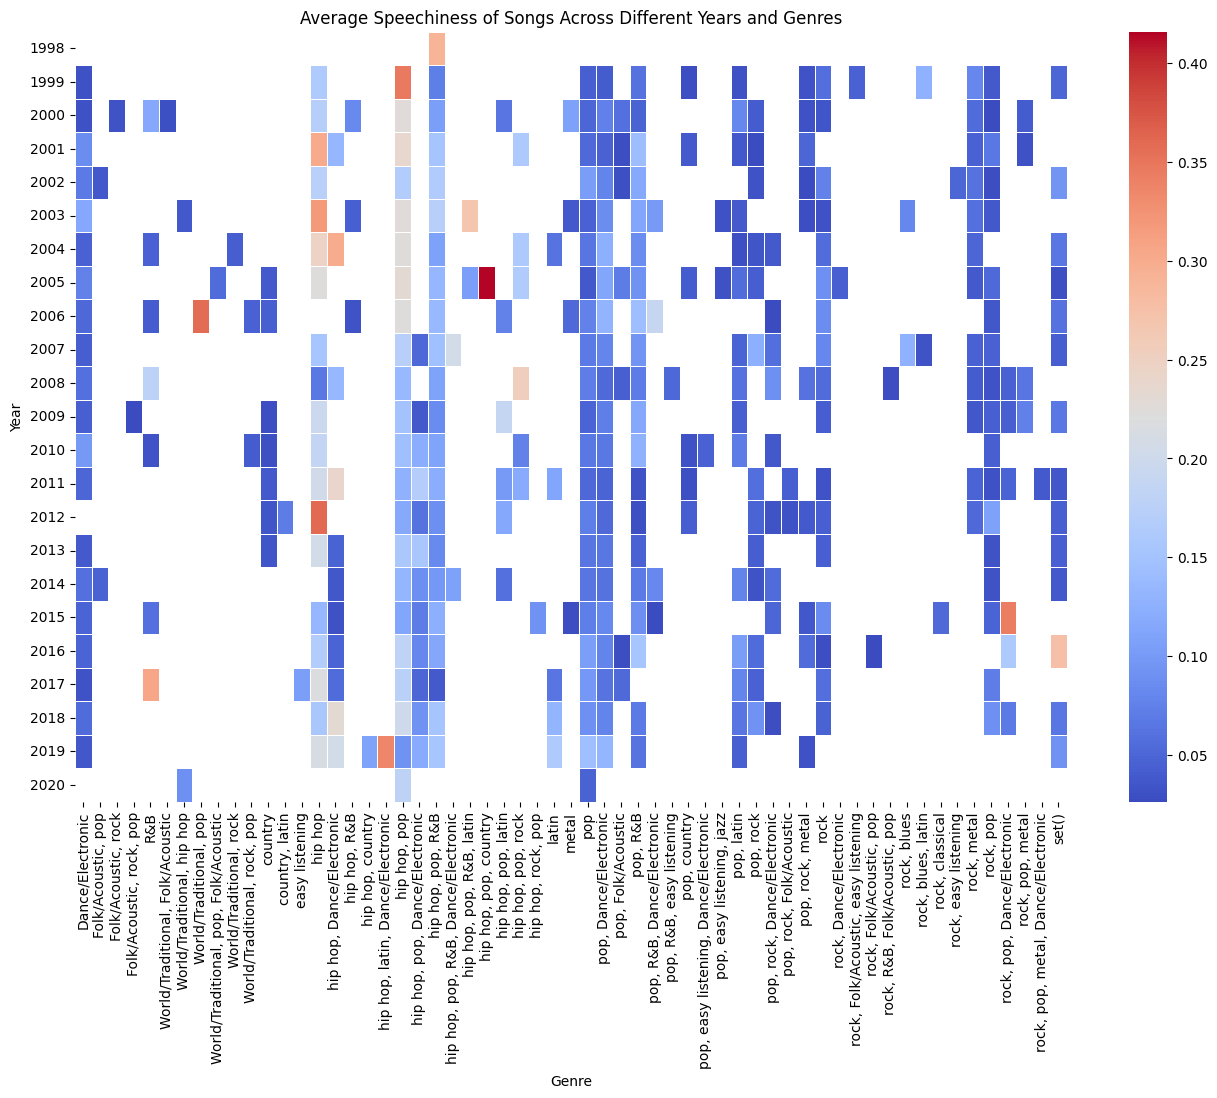

In [225]:
#58 Analyze how the speechiness of songs varies across different years and genres.
years_genres = df.groupby(['year','genre'])['speechiness'].mean().reset_index()
pivot_df = years_genres.pivot(index='year', columns='genre', values='speechiness')

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, annot=False, cmap='coolwarm', linewidths=.6)
plt.title('Average Speechiness of Songs Across Different Years and Genres')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

In [226]:
#59 Determine which artists have the most songs that are both highly danceable and energetic.
artists = df.groupby('artist')[['danceability','energy']].mean().reset_index().sort_values(['danceability','energy'],ascending=False)
artists_list = artists[artists['danceability']>0.8][artists['energy']>0.8]['artist'].tolist()
print("Artists having more number of songs that are both highly danceable and energetic are:")
for i in artists_list:
    print(f"'{i}'")

Artists having more number of songs that are both highly danceable and energetic are:
'Sak Noel'
'Big Shaq'
'AJ Tracey'
'Yolanda Be Cool'
'Saweetie'
'Room 5'
'Will Smith'
'Megan Thee Stallion'
'Baha Men'
'Crazy Frog'
'Christina Milian'
'DJ Casper'
'Rachel Stevens'
'DJ Pied Piper & The Masters Of Ceremonies'
'Camille Jones'
'Nas'
'Storm Queen'
'Bomfunk MC's'
'Fedde Le Grand'
'INNA'
'Natti Natasha'
'Dr. Dre'
'O-Zone'
'Madison Avenue'
'Zay Hilfigerrr'
'Sidney Samson'
'Ayo & Teo'
'Bob Sinclar'
'The Ting Tings'
'Bingo Players'
'Tom Jones'


C:\Users\HP\AppData\Local\Temp\ipykernel_9000\3972094766.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [227]:
#60 Identify the years where there were significant shifts in the average key of songs.
average_key_by_year = df.groupby('year')['key'].mean().reset_index()
std_threshold = 1.5  
average_key_by_year['key_std'] = average_key_by_year['key'].rolling(window=5, min_periods=1).std()
significant_shifts = average_key_by_year[average_key_by_year['key_std'] > std_threshold]
print("Years with significant shifts in average key:")
print(significant_shifts[['year', 'key', 'key_std']])

Years with significant shifts in average key:
   year       key   key_std
1  1999  5.131579  2.921467
2  2000  5.148649  2.390311
3  2001  5.240741  2.087379
4  2002  5.644444  1.930395


In [228]:
#61 Analyze the relationship between tempo and danceability across different years.
mp = {}
for year in df['year'].unique():
    yearly_df = df[df['year']==year]
    if len(yearly_df)>1:
        correlation, p_value = pearsonr(yearly_df['tempo'], yearly_df['danceability'])
        mp[year] = (correlation, p_value)

for year, (correlation, p_value) in mp.items():
    print(f"Year: {year}, Correlation: {correlation.round(2)}, P_value: {p_value.round(2)}")

Year: 2000, Correlation: -0.06, P_value: 0.62
Year: 1999, Correlation: -0.36, P_value: 0.03
Year: 2001, Correlation: -0.19, P_value: 0.05
Year: 2011, Correlation: -0.06, P_value: 0.58
Year: 2002, Correlation: -0.13, P_value: 0.21
Year: 2016, Correlation: -0.27, P_value: 0.01
Year: 2018, Correlation: 0.05, P_value: 0.61
Year: 2004, Correlation: -0.28, P_value: 0.0
Year: 2010, Correlation: -0.1, P_value: 0.31
Year: 2015, Correlation: -0.14, P_value: 0.17
Year: 2006, Correlation: -0.0, P_value: 0.98
Year: 2008, Correlation: -0.18, P_value: 0.07
Year: 2019, Correlation: -0.29, P_value: 0.01
Year: 2003, Correlation: -0.11, P_value: 0.28
Year: 2013, Correlation: -0.42, P_value: 0.0
Year: 2005, Correlation: -0.31, P_value: 0.0
Year: 2012, Correlation: -0.01, P_value: 0.88
Year: 2020, Correlation: -0.99, P_value: 0.07
Year: 2007, Correlation: -0.25, P_value: 0.01
Year: 2009, Correlation: -0.25, P_value: 0.02
Year: 2017, Correlation: -0.1, P_value: 0.31
Year: 2014, Correlation: -0.22, P_value: 

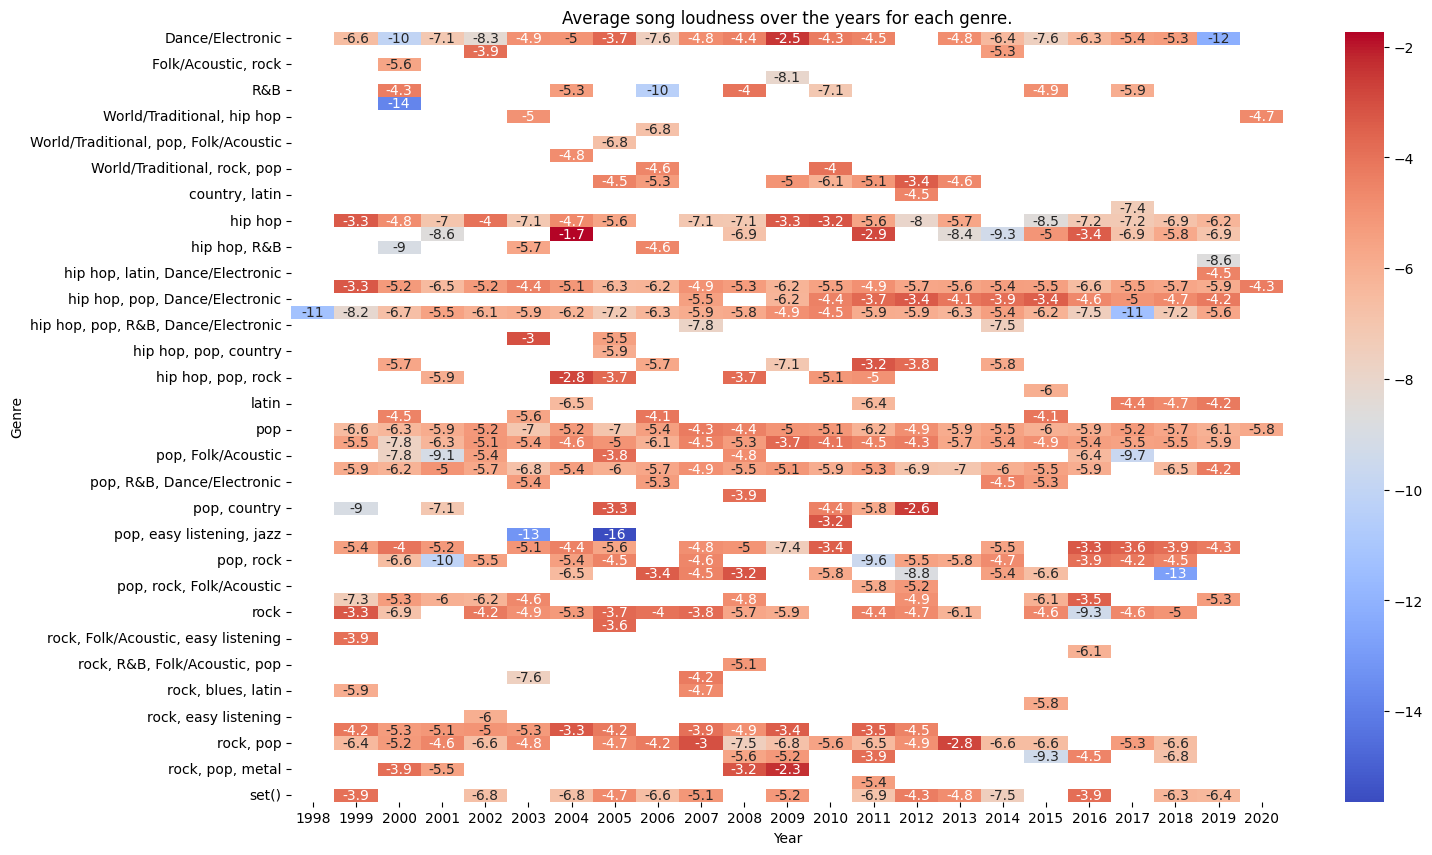

In [229]:
#62 Analyze the change in average song loudness over the years for each genre.
average_song_loudness = df.groupby(['year','genre'])['loudness'].mean().reset_index()
average_song_loudness_plot = average_song_loudness.pivot(index="genre",columns="year",values="loudness")

plt.figure(figsize=(16,10))
sns.heatmap(average_song_loudness_plot,annot=True,cmap="coolwarm")
plt.title("Average song loudness over the years for each genre.")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.show()

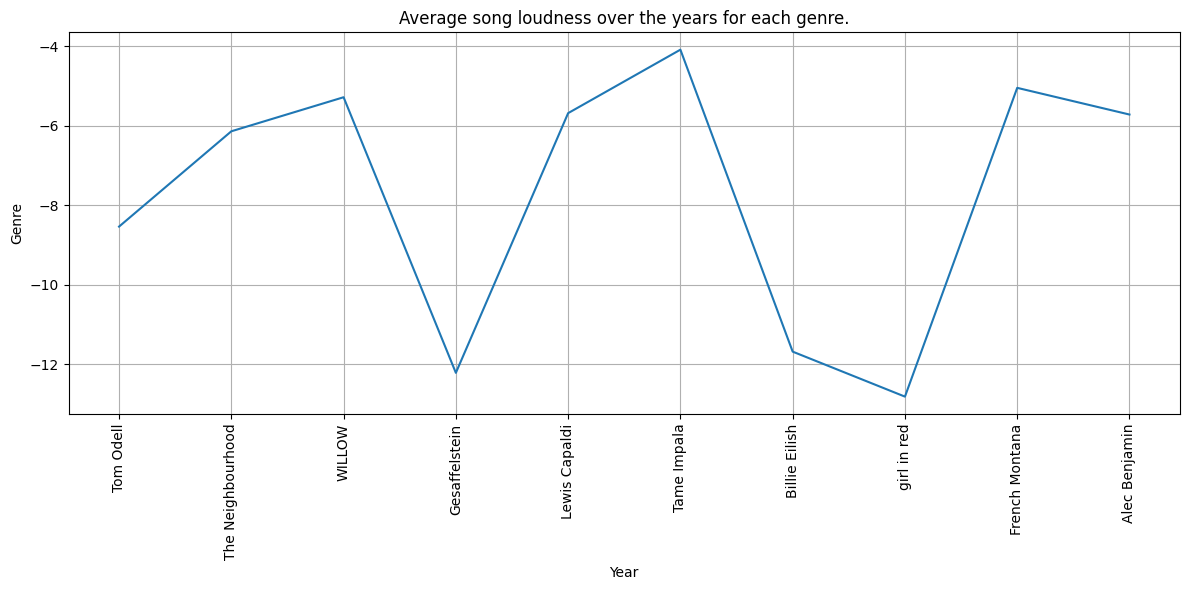

In [230]:
#63 Track the changes in the average loudness of songs for the top 10 most popular artists.
popular_artists = df.groupby('artist')['popularity'].mean().sort_values(ascending=False).reset_index().head(10)
popular_artists['avg_loudness'] = popular_artists['artist'].apply(lambda x: df[df['artist']==x]['loudness'].mean())

plt.figure(figsize=(12,6))
sns.lineplot(x='artist',y='avg_loudness',data=popular_artists)
plt.title("Average song loudness over the years for each genre.")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

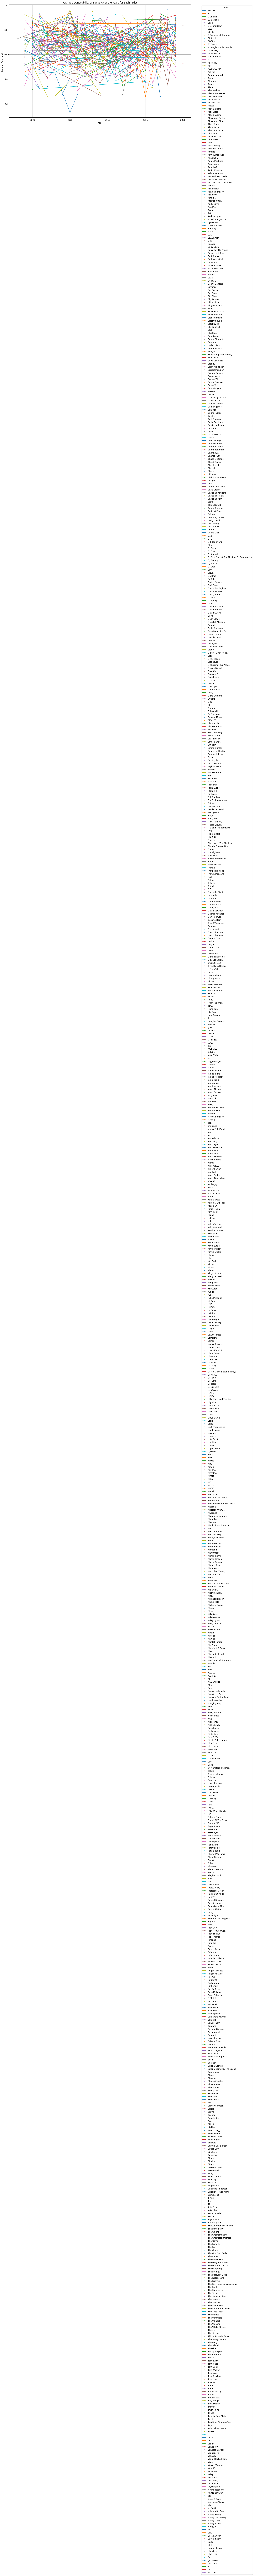

In [231]:
#64 Analyze how the average danceability of songs has changed for each artist over the years.
danceability  = df.groupby(['artist','year'])['danceability'].mean().reset_index()

plt.figure(figsize=(16,10))
for artist in danceability['artist'].unique():
    artist_data = danceability[danceability['artist'] == artist]
    plt.plot(artist_data['year'],artist_data['danceability'], marker='.',label=artist)

plt.xlabel('Year')
plt.ylabel('Average Danceability')
plt.title('Average Danceability of Songs Over the Years for Each Artist')
plt.legend(title="Artist",bbox_to_anchor=(1.05,1))
plt.grid(True)
plt.show()

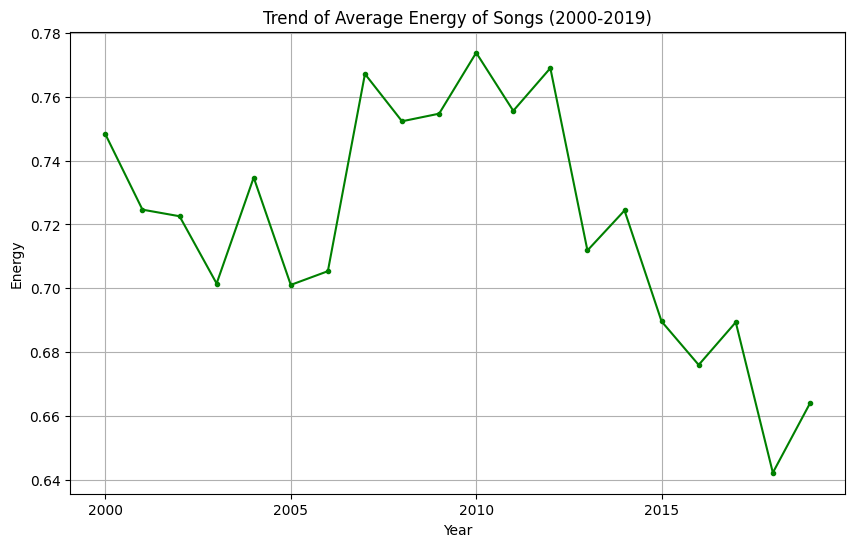

In [232]:
#65 Analyze the trend of the average energy of songs over each quarter of the year from 2000 to 2019.
avg_energy = df[(df.year>1999) & (df.year<2020)].groupby('year')['energy'].mean().reset_index()
avg_energy_quater = int(len(avg_energy)/4)

plt.figure(figsize=(10,6))
plt.plot(avg_energy['year'],avg_energy['energy'],color='g',marker='.')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.title('Trend of Average Energy of Songs (2000-2019)')
plt.grid(True)
plt.xticks(range(2000, 2020, avg_energy_quater))  # Adjust the range and step according to your data
plt.show()

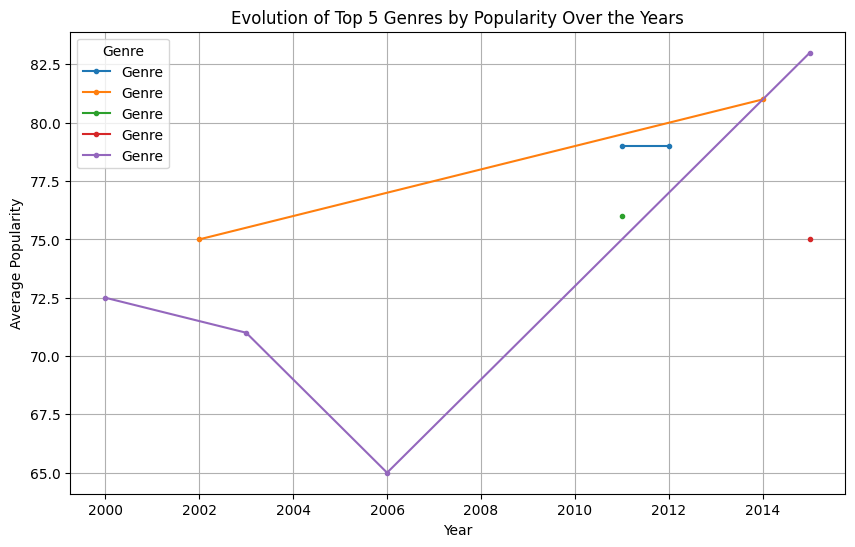

In [233]:
#66 Track the evolution of the top 5 genres by popularity over the years and identify any genre shifts.
genre = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(5).index.tolist()
genre_df_by_year = df[df['genre'].isin(genre)].groupby(['year','genre'])['popularity'].mean().reset_index()

plt.figure(figsize=(10,6))
for g in genre:
    genre_df = genre_df_by_year[genre_df_by_year['genre'] == g]
    plt.plot(genre_df['year'],genre_df['popularity'],marker='.',linestyle='-',label='Genre')

plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Evolution of Top 5 Genres by Popularity Over the Years')
plt.legend(title='Genre')
plt.grid(True)
plt.xticks()
plt.show()

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

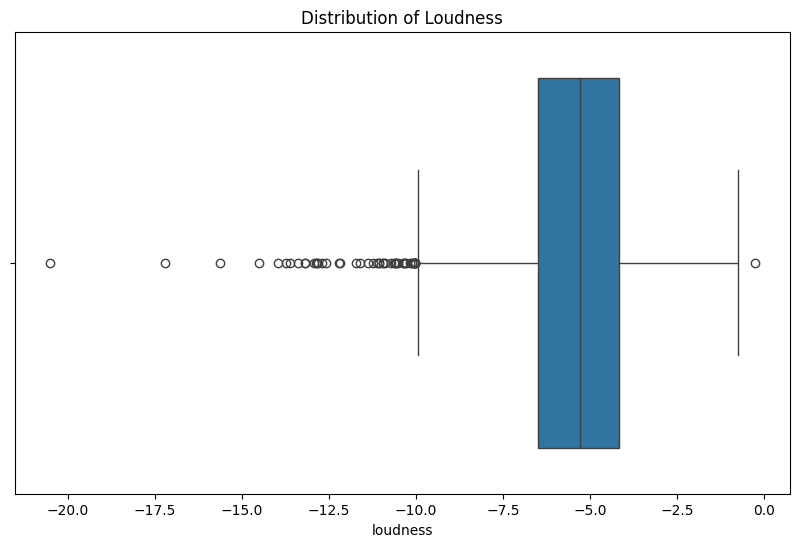

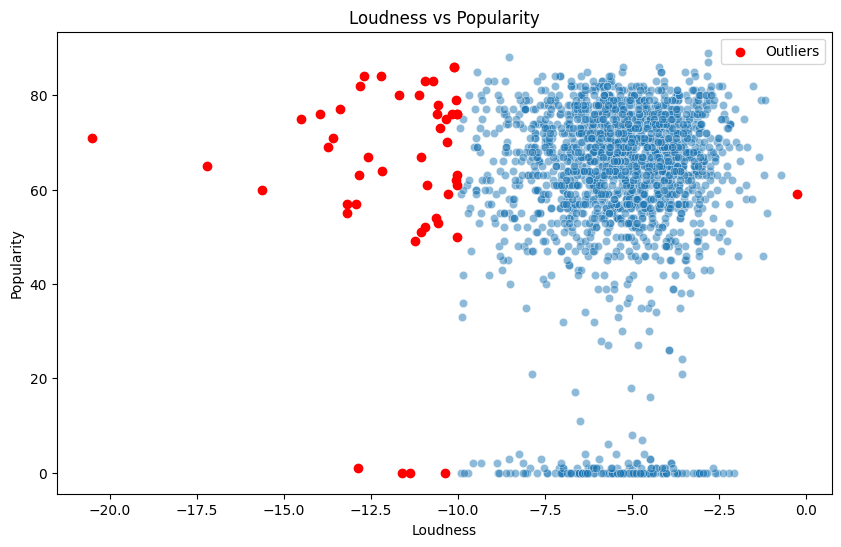

In [234]:
#67 Perform EDA to find outliers in loudness and their impact on song popularity.
print(df.head())
print(df.describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['loudness'])
plt.title('Distribution of Loudness')
plt.show()

Q1 = df['loudness'].quantile(0.25)
Q3 = df['loudness'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['loudness'] < lower_bound) | (df['loudness'] > upper_bound)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='popularity', data=df, alpha=0.5)
plt.scatter(outliers['loudness'], outliers['popularity'], color='red', label='Outliers')
plt.title('Loudness vs Popularity')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.legend()
plt.show()

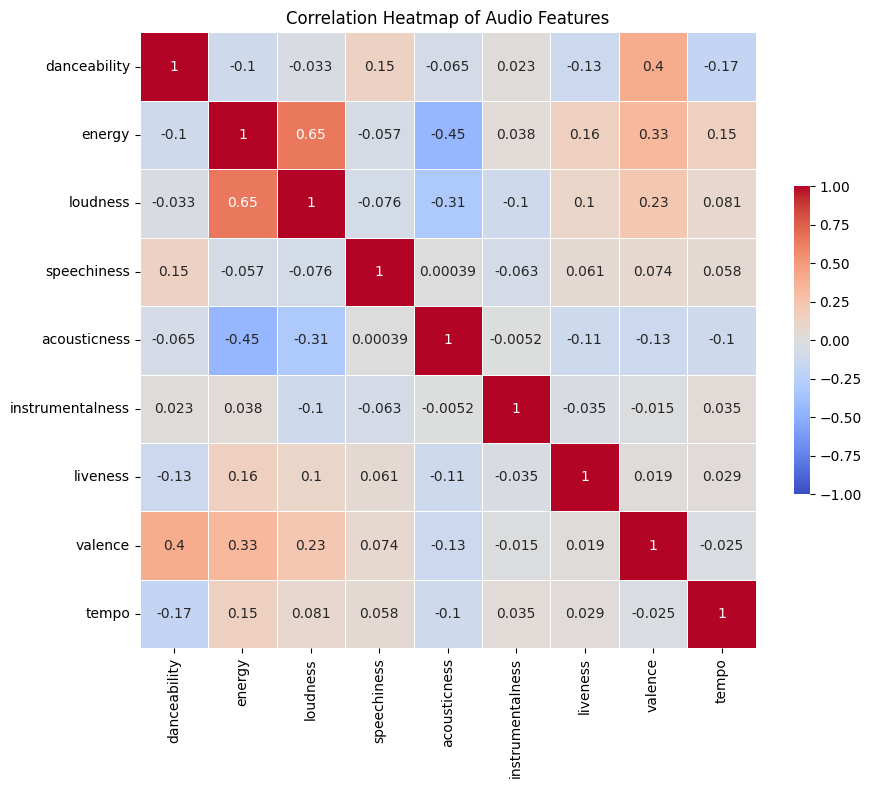

In [235]:
#69 Create a heatmap to visualize the correlation between different audio features.
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

corr_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Audio Features')
plt.show()

Correlation between number of explicit songs and popularity: 0.5576989474907981



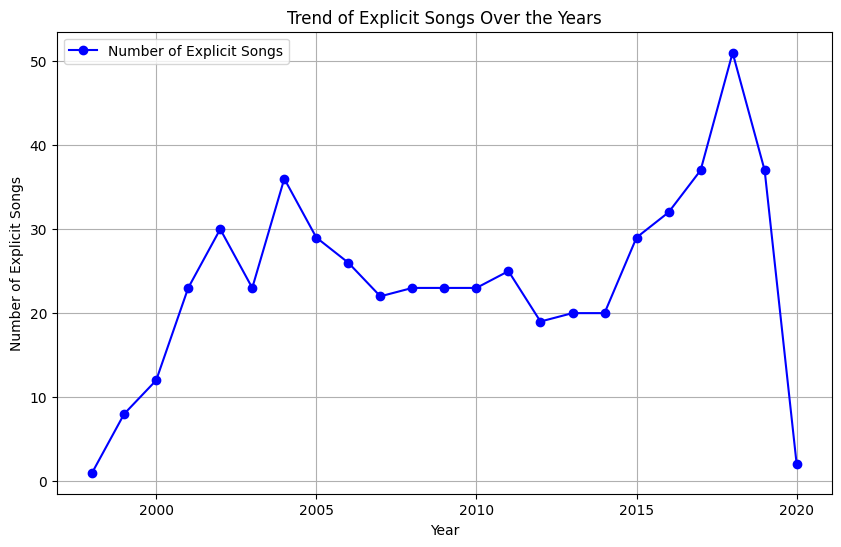

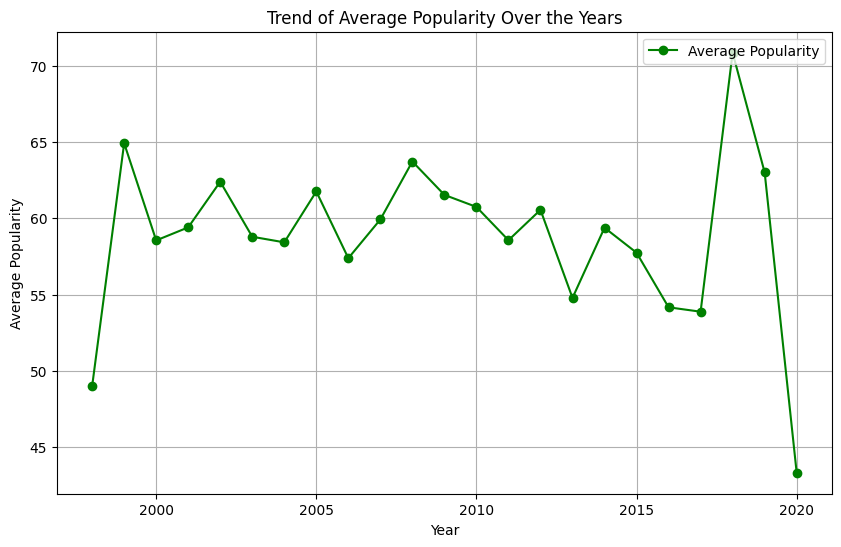

In [236]:
#70 Analyze the trend of explicit songs over the years and its correlation with popularity.
explicit_trend = df.groupby('year').agg({'explicit': 'sum','popularity': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(explicit_trend['year'], explicit_trend['explicit'], marker='o', linestyle='-', color='blue', label='Number of Explicit Songs')
plt.xlabel('Year')
plt.ylabel('Number of Explicit Songs')
plt.title('Trend of Explicit Songs Over the Years')
plt.grid(True)
plt.legend(loc='upper left')

plt.figure(figsize=(10, 6))
plt.plot(explicit_trend['year'], explicit_trend['popularity'], marker='o', linestyle='-', color='green', label='Average Popularity')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Trend of Average Popularity Over the Years')
plt.grid(True)
plt.legend(loc='upper right')

correlation = explicit_trend['explicit'].corr(explicit_trend['popularity'])
print(f"Correlation between number of explicit songs and popularity: {correlation}")
print()

plt.show()

## Queries Based on Machine Learning Models

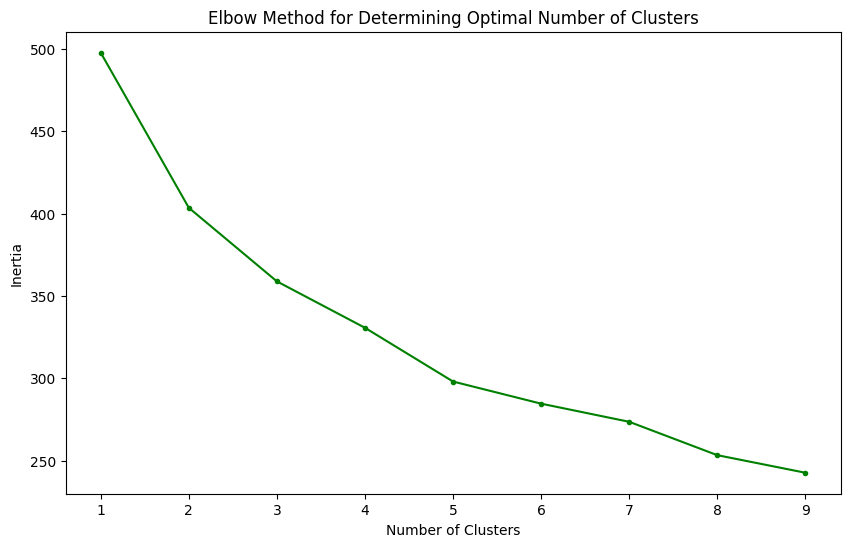

C:\Users\HP\AppData\Local\Temp\ipykernel_9000\755300413.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



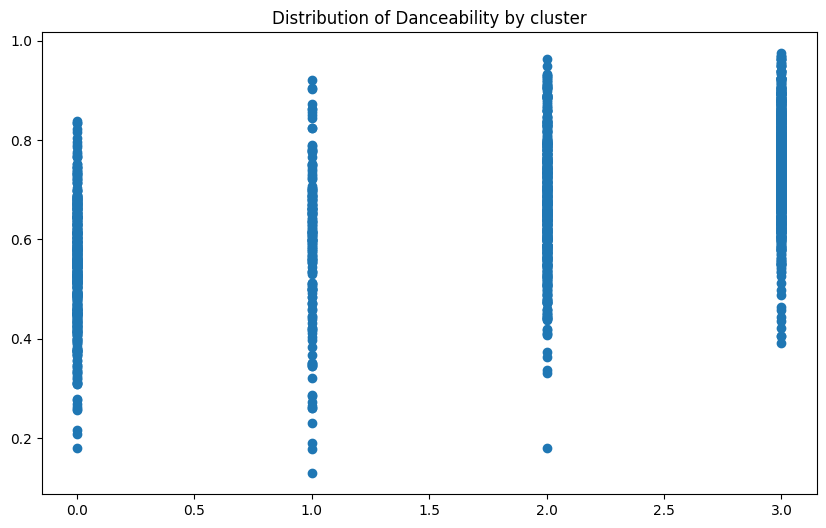

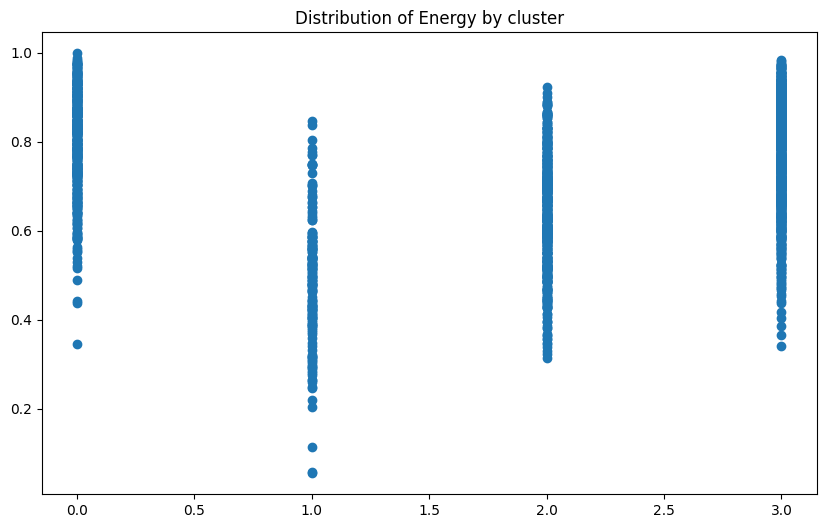

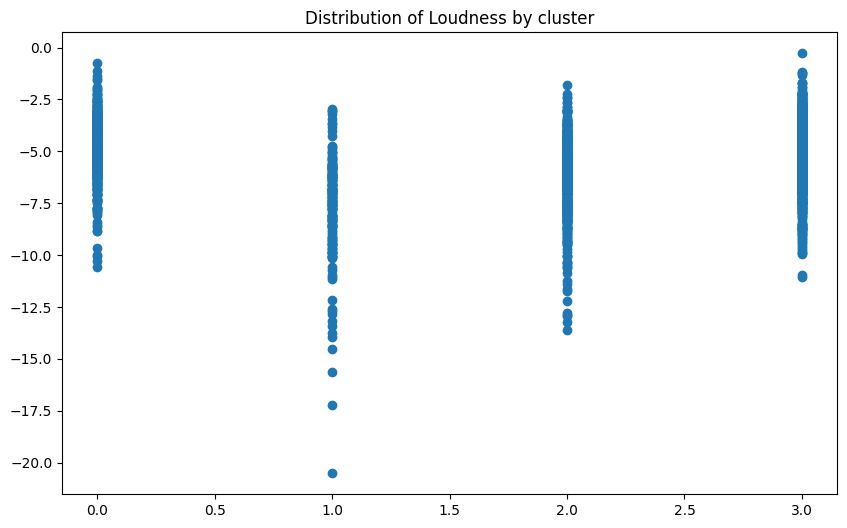

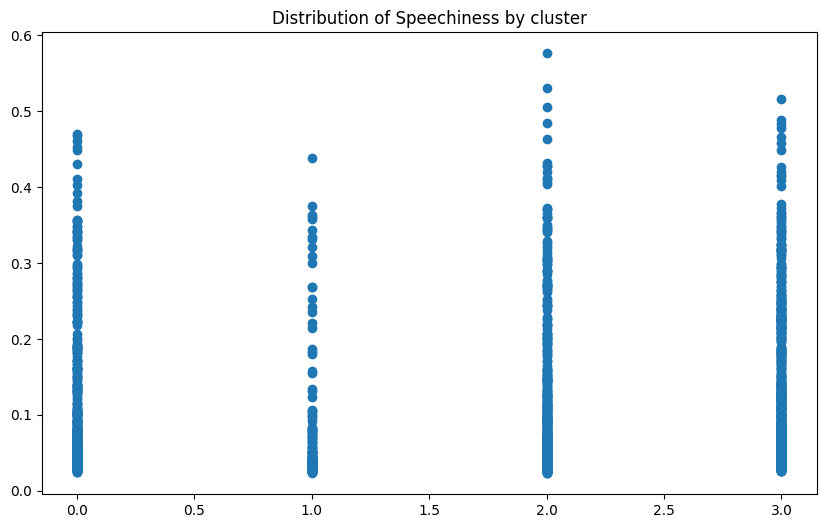

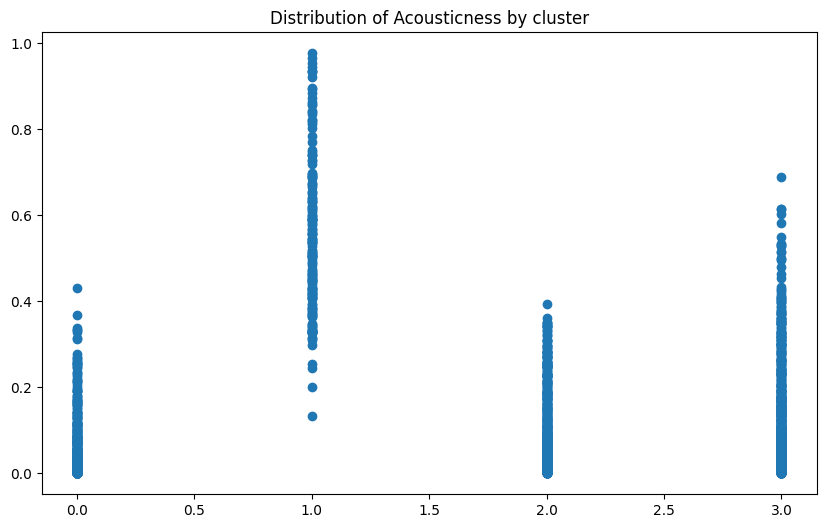

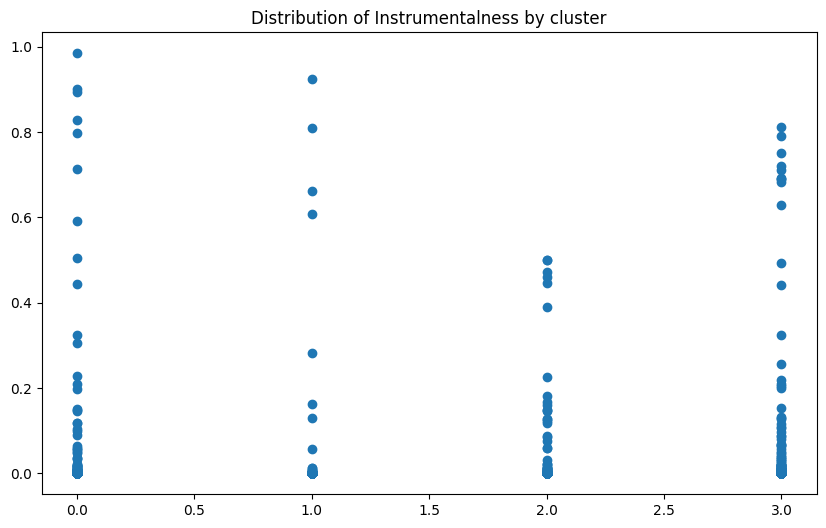

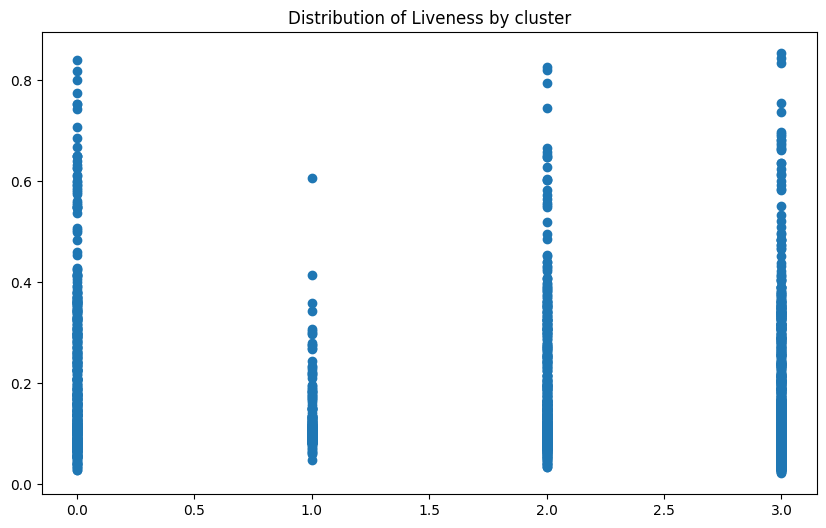

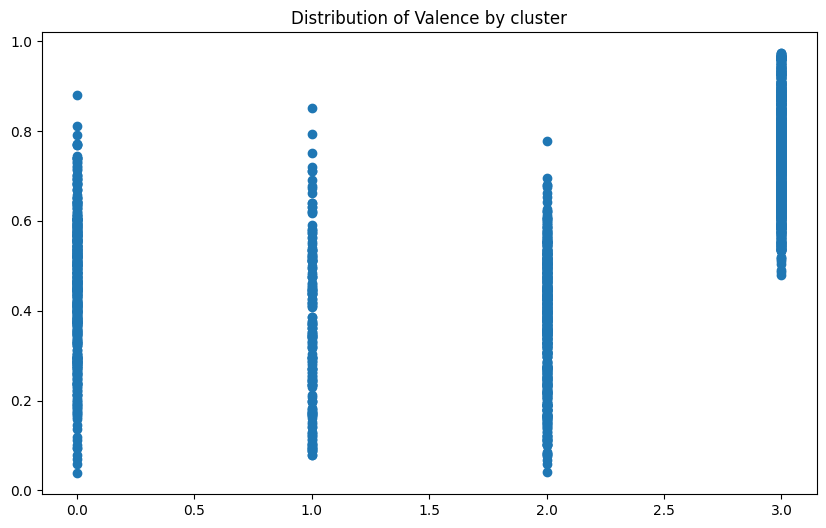

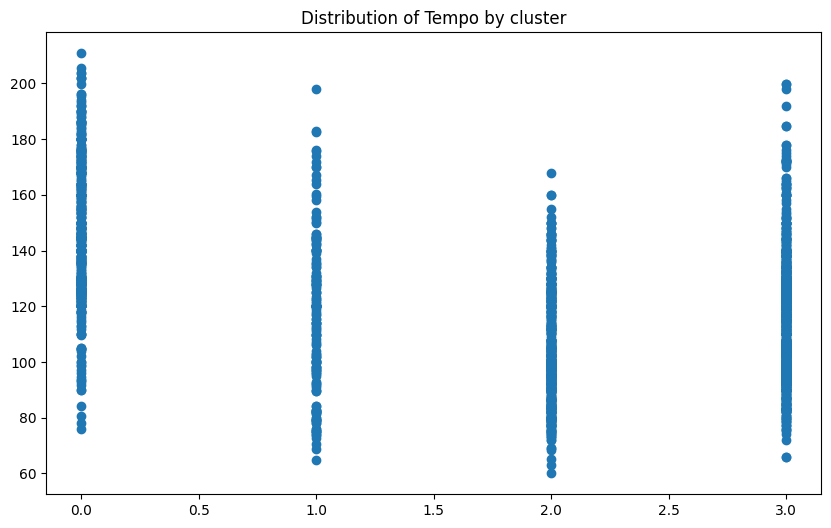

The characteristics of each cluster is:
   danceability    energy  loudness  speechiness  acousticness  \
0      0.545414  0.805678 -4.825974     0.106050      0.054168   
1      0.590206  0.494229 -7.707418     0.076682      0.553418   
2      0.675386  0.640155 -6.149377     0.105060      0.097072   
3      0.743599  0.769079 -5.050605     0.106692      0.103889   

   instrumentalness  liveness   valence       tempo  cluster  
0          0.021128  0.217407  0.451469  145.831722        1  
1          0.021850  0.135502  0.365658  116.686006        2  
2          0.009730  0.181882  0.375972  104.941639        3  
3          0.014110  0.170491  0.750898  116.328141        4  


In [237]:
#71 Perform k-means clustering on songs based on their audio features (danceability, energy, loudness, etc.) and analyze the characteristics of each cluster.
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[audio_features]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1,10):
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10),inertia,marker='.',color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

#since we can estimate that 4 can be the best no of clusters that can be formed

km = KMeans(n_clusters=4,random_state=42)
X['cluster'] = km.fit_predict(X_scaled)

for feature in audio_features:
    plt.figure(figsize=(10,6))
    plt.scatter(x = 'cluster', y = feature, data=X)
    plt.title(f"Distribution of {feature.capitalize()} by cluster")
    plt.show()

#Analyzing the characteristics of each cluster.
character_cluster = scaler.inverse_transform(km.cluster_centers_)
character_cluster_df = pd.DataFrame(character_cluster, columns = audio_features)
character_cluster_df['cluster'] = range(1,5)
print("The characteristics of each cluster is:")
print(character_cluster_df)

Mean Squared Error: 504.17783790006945
R^2 Score: -0.05252076265196881


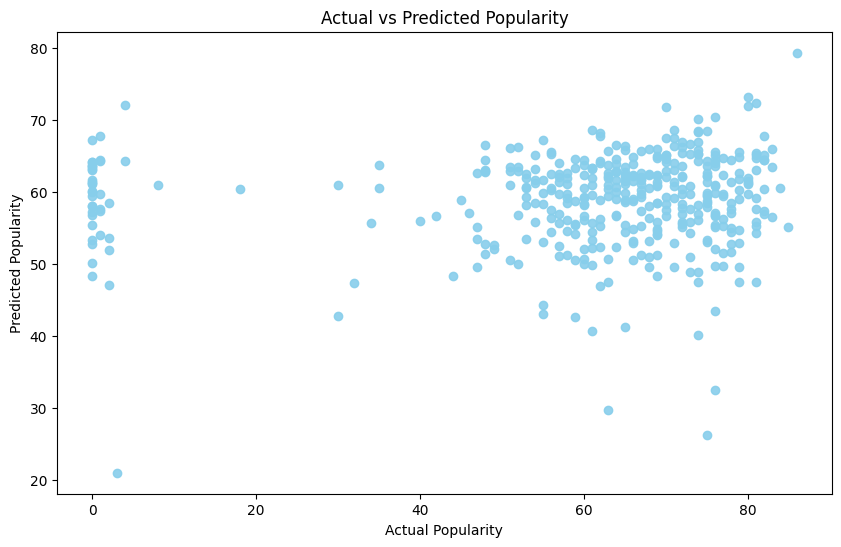

In [238]:
#72 Build a predictive model to forecast the popularity of songs based on their audio features.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

x = df[audio_features]
y = df[target]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = RandomForestRegressor(n_estimators=100, random_state = 42)
model.fit(x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.9,color='skyblue')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()

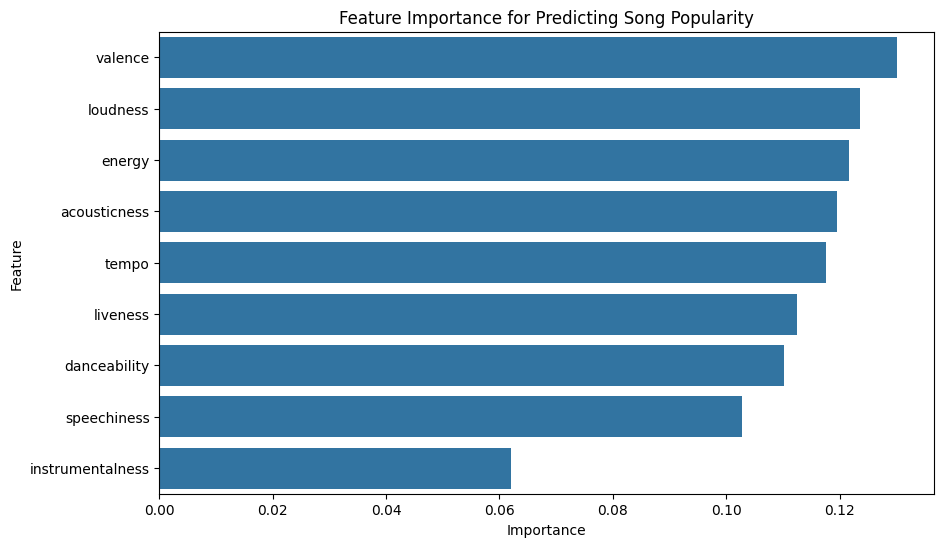

            Feature  Importance
7           valence    0.130168
2          loudness    0.123523
1            energy    0.121617
4      acousticness    0.119565
8             tempo    0.117598
6          liveness    0.112430
0      danceability    0.110199
3       speechiness    0.102786
5  instrumentalness    0.062113


In [239]:
#73 Use a machine learning model to determine which audio features are most important for predicting song popularity.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

X = df[audio_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': audio_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Song Popularity')
plt.show()

print(importance_df)